# Homework #1

**Ezgi Özgen**

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

While analyzing, we imported the libraries necessary to process our data.

**numpy**: We use it to format and manipulate our data.

**pandas** : We use it to read our data and process it.

**matplotlib**: We use it to visualize with our data.

**gzip**: we use it for single file/stream lossless data compression, where the compressed file usually has a suffix.

**urllib**: we use it to fetch the url

**xmltodict**: We use it to operate on xml files.

**zipfile**: We use it to process zip files.

We use **io** to check for new versions.

**datetime**: We use it for values in datetime format.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
import datetime

First of all, I pulled the data on the requested topics from the worldbank site. I copied the link path by right-clicking on the xml link on the site. I then assigned these links to variables. Because of the difficulty of reading all of them one by one, I wrote a function that opens the link with urlopen, then takes the zipfile and prints the names of the files in it. After learning the names of these files, I parse them and save them as ordereddict.

In [34]:
Literacy_link='https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=xml'
Child_link='https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=xml'
Gini_link='https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml'
def urlread(link,zipname):
    with urlopen(link) as url:
        zfile = ZipFile(BytesIO(url.read()))
        print(zfile.filelist)
        return parse(zfile.open(zipname).read())
         
        

Literacydf=urlread(Literacy_link,'API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml')
Childdf = urlread(Child_link,'API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml')
Ginidf = urlread(Gini_link,'API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml')

[<ZipInfo filename='API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml' compress_type=deflate file_size=4768054 compress_size=104459>]
[<ZipInfo filename='API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml' compress_type=deflate file_size=4533211 compress_size=119924>]
[<ZipInfo filename='API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml' compress_type=deflate file_size=3806005 compress_size=72157>]


I'm converting a dataframe so that we can process the data that comes in the form of an ordereddict. Here it is in the inner layer root, data, and record. That's why I go down layer by layer, the last layer field remains, we have variables with keys and values in it. By writing a for loop in the field, I get our existing data taken as values of  #text(is key). the other value is Keys are fields assigned as @name. I'm creating a dictionary structure within a list

In [35]:
def todataframe(df):
    xs=[{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys() } for y in df['Root']['data']['record']]
    return pd.DataFrame(xs)
Literacydf=todataframe(Literacydf)

I'm converting the dictionaries in this list into a dataframe so that I can make sense of it later.

In [36]:
Childdf=todataframe(Childdf)
Ginidf =todataframe(Ginidf)
Ginidf

,Country or Area,Item,Year,Value
0,Aruba,Gini index,1960,NaN
1,Aruba,Gini index,1961,NaN
2,Aruba,Gini index,1962,NaN
3,Aruba,Gini index,1963,NaN
4,Aruba,Gini index,1964,NaN
...,...,...,...,...
16487,Zimbabwe,Gini index,2017,44.3
16488,Zimbabwe,Gini index,2018,NaN
16489,Zimbabwe,Gini index,2019,50.3
16490,Zimbabwe,Gini index,2020,NaN


I will plot Turkey's data in the dataframe by taking the time from the earliest date to this year, but since it would take a long time to write them all one by one, I am setting up a function structure. It takes the word to be filtered and a dataframe. Then it converts the values into numbers and draws that value by filtering with the plot method.

In [37]:
def plotize(df,filterv):
    df['Value']=pd.to_numeric(df['Value'])
    plt.figure(figsize=(40,12))
    plt.plot(df[df['Country or Area']==filterv]['Year'], df[df['Country or Area']==filterv]['Value'], marker='o')

I had the graphs drawn separately for our three data. 
* Here, the first graph tells us that the Child mortality rate is on the decline (decreasing trend). 
* There is no continuous graph because there are missing Literacy rate woman values, but the graph says that it has been increasing recently. 
* Our final chart shows that the Gini index has followed an irregular path over the years.

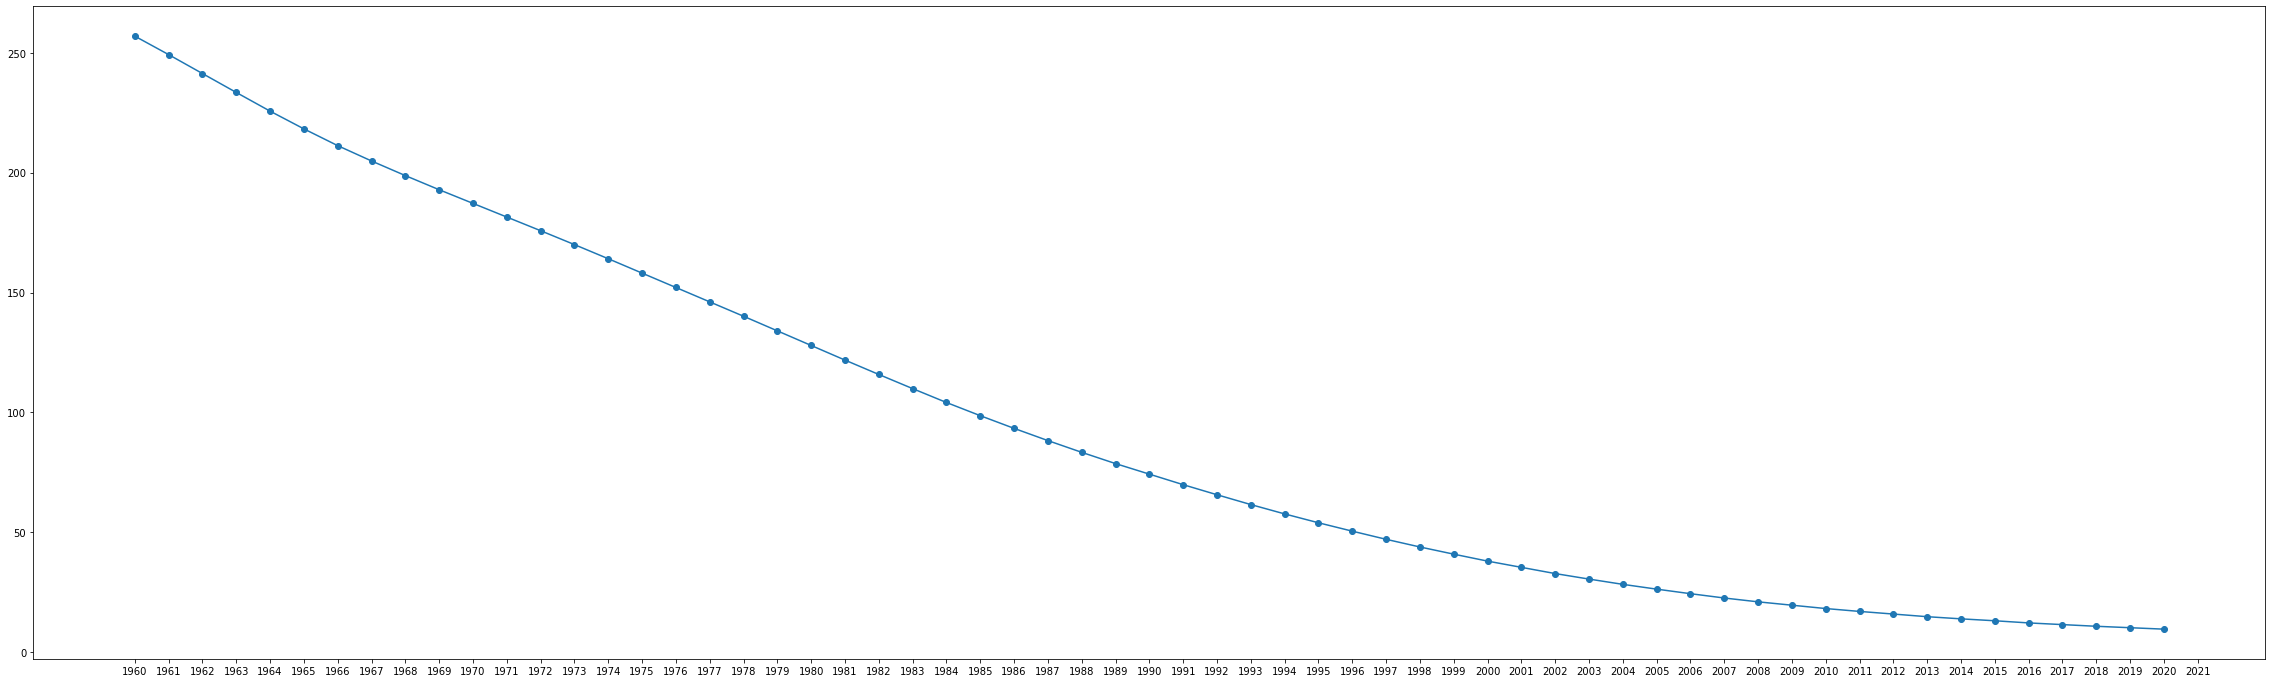

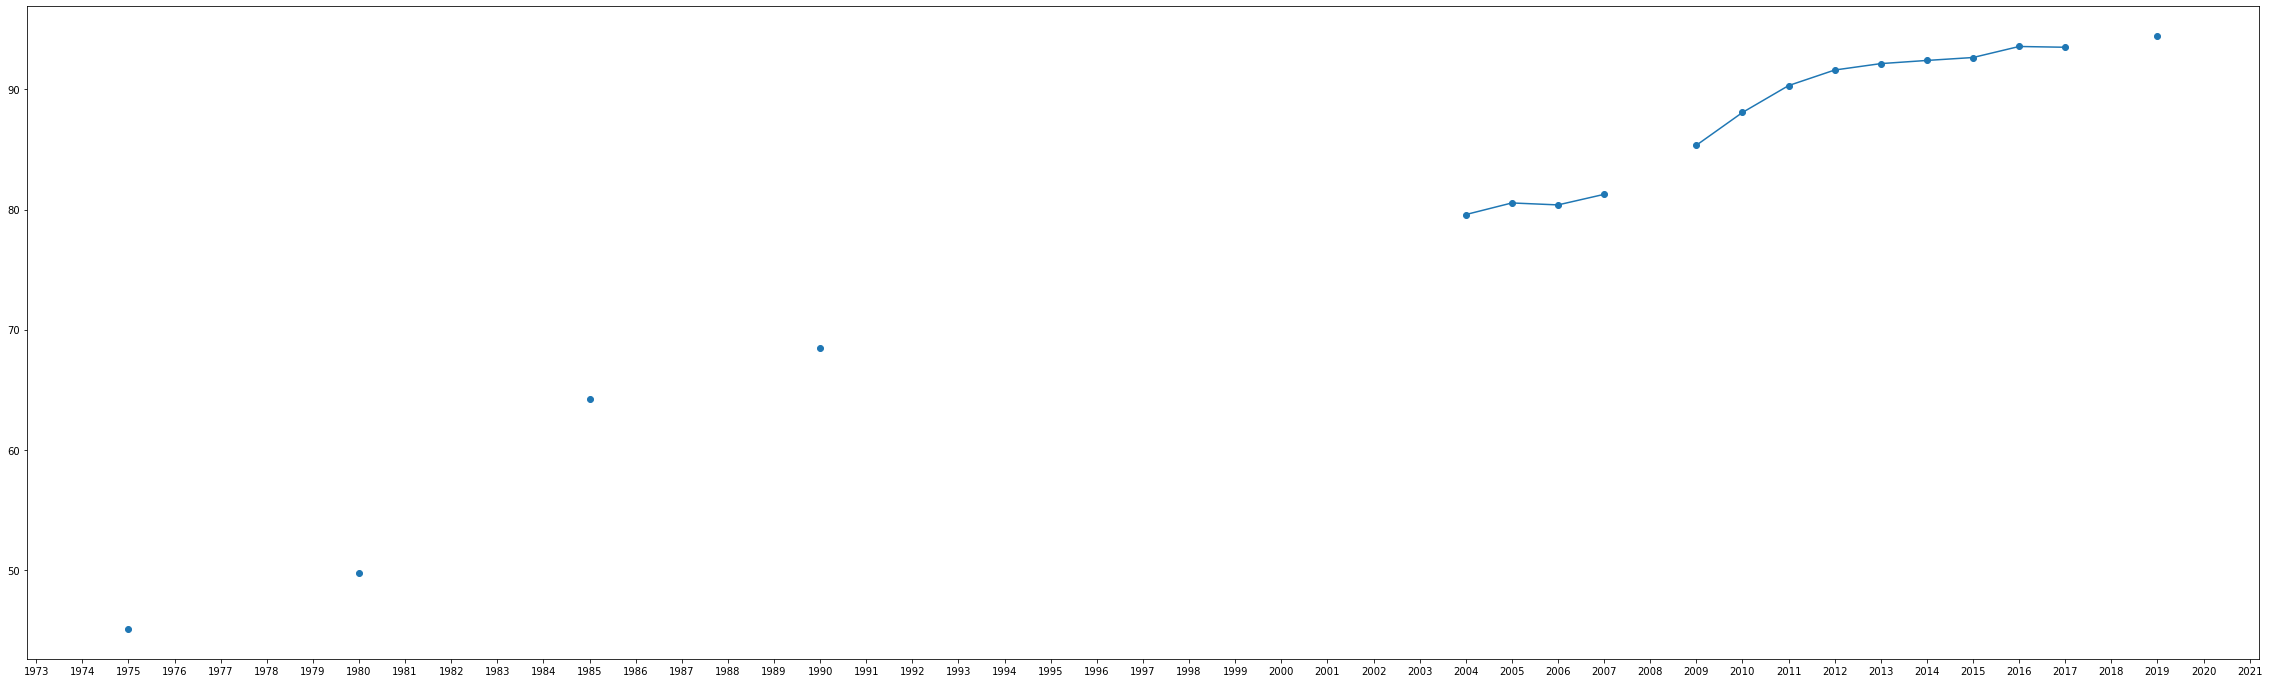

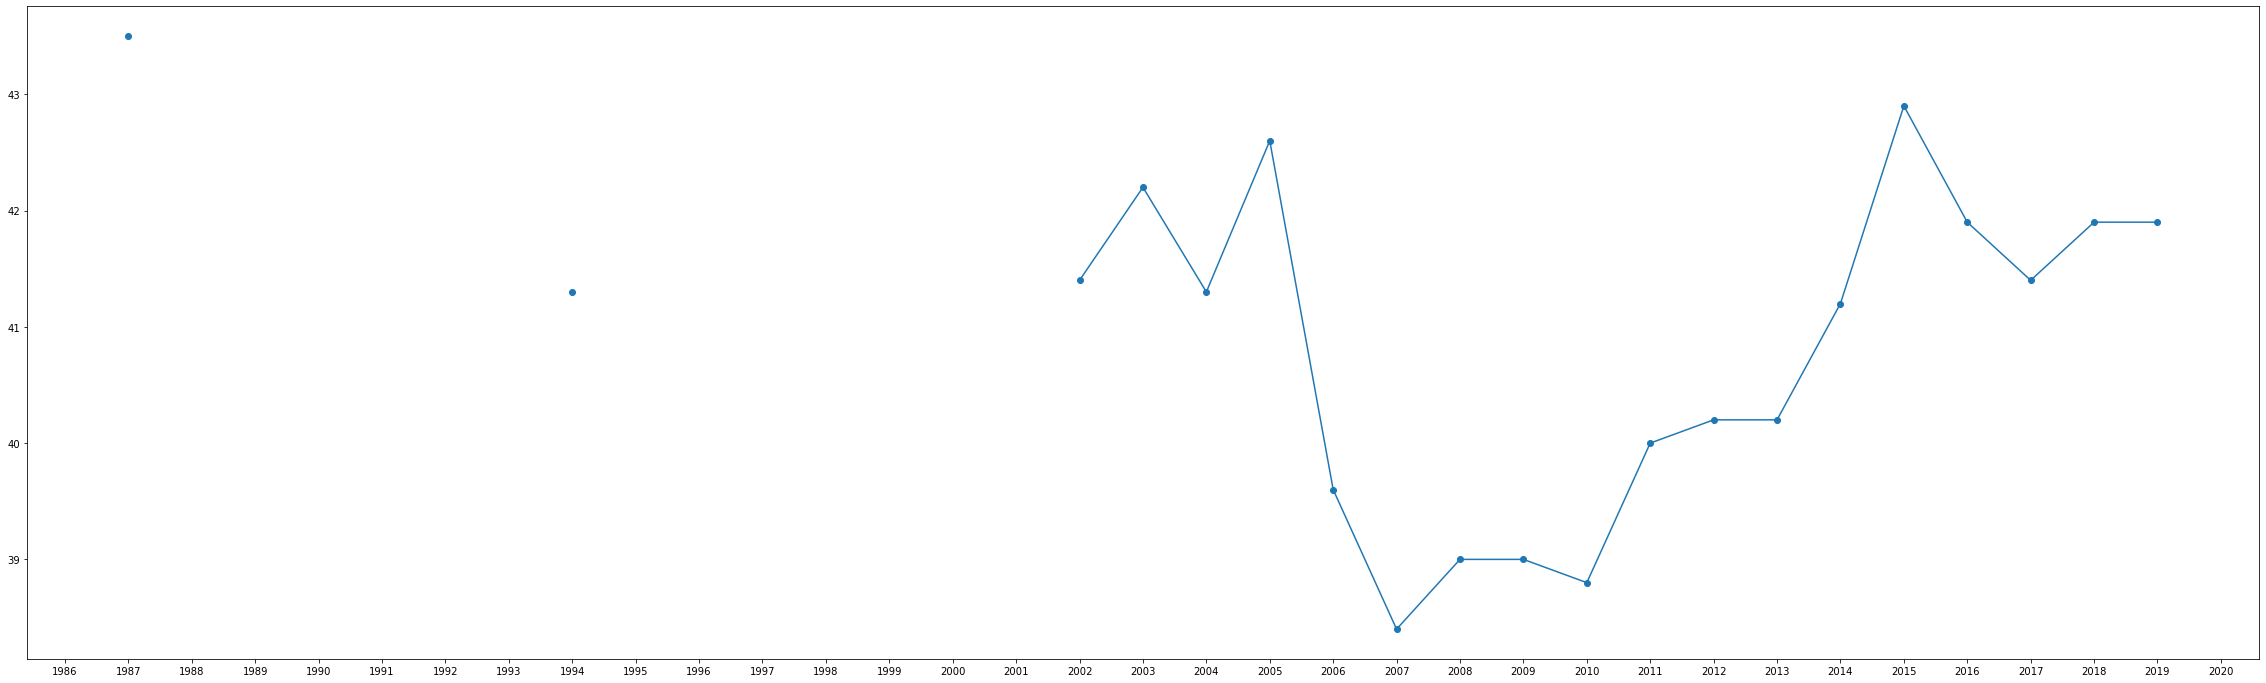

In [38]:
plotize(Childdf,'Turkiye')
plotize(Literacydf,'Turkiye')
plotize(Ginidf,'Turkiye')

When we plot the Greek data:

* In the first chart, the same figure as Turkey, the child mortality rate progressed in a decreasing trend.
* In the second graph, we can notice that the literacy rate of woman has increased recently in single points, again due to less data.
* In our last chart, the Gini index showed a fluctuating result but experienced a decrease in recent dates.

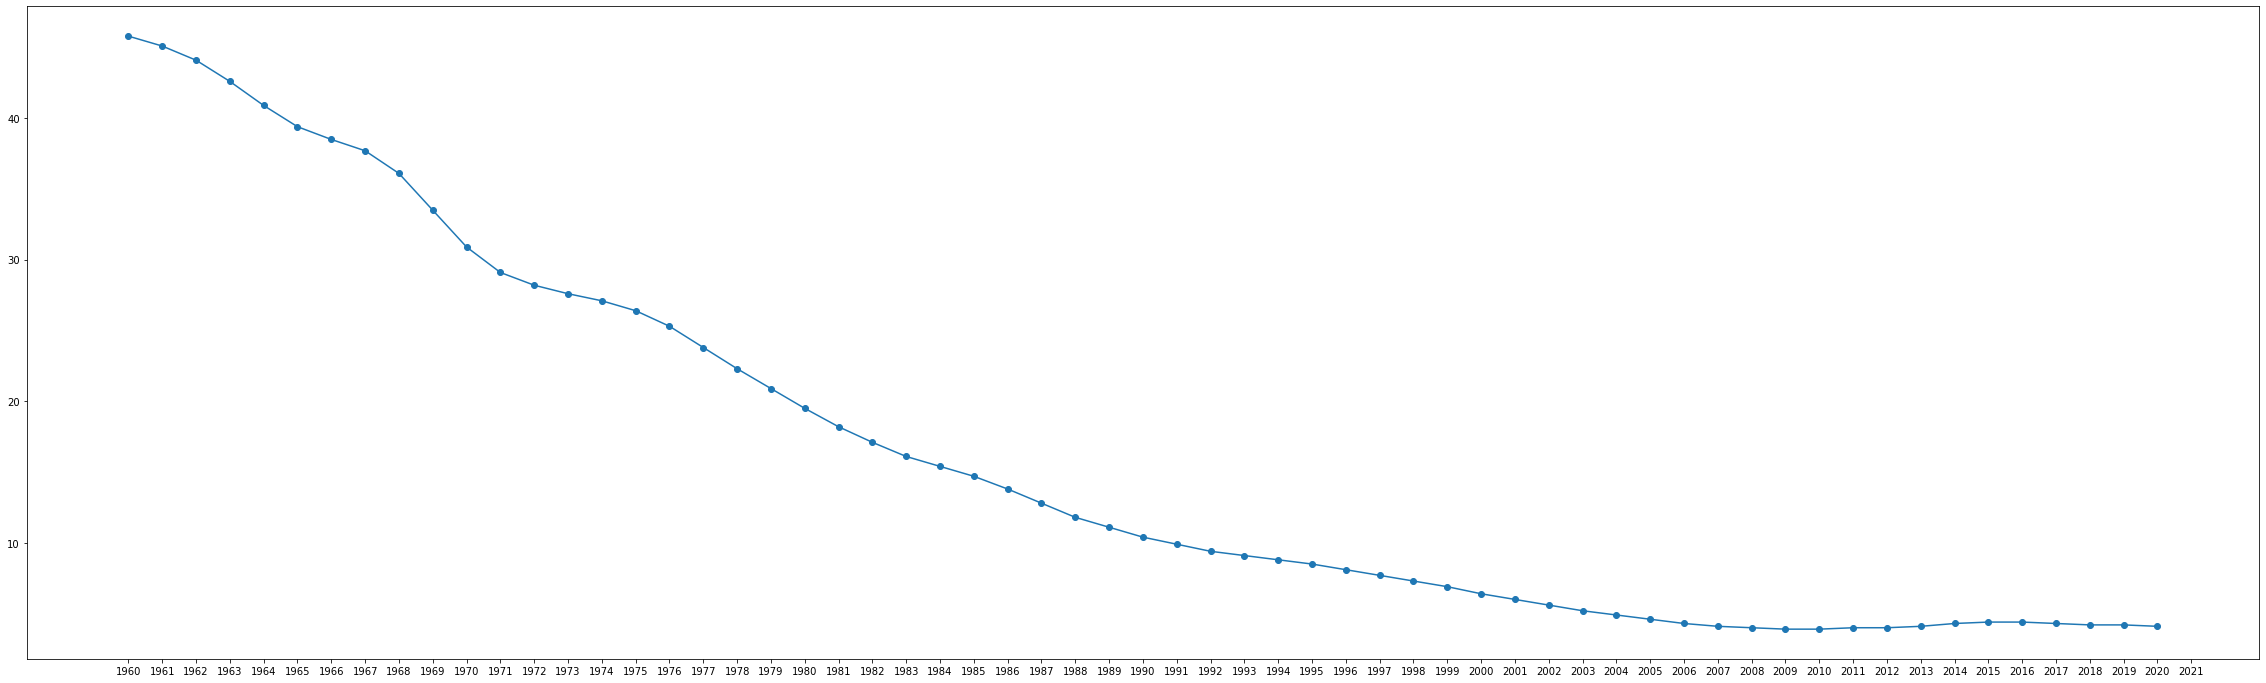

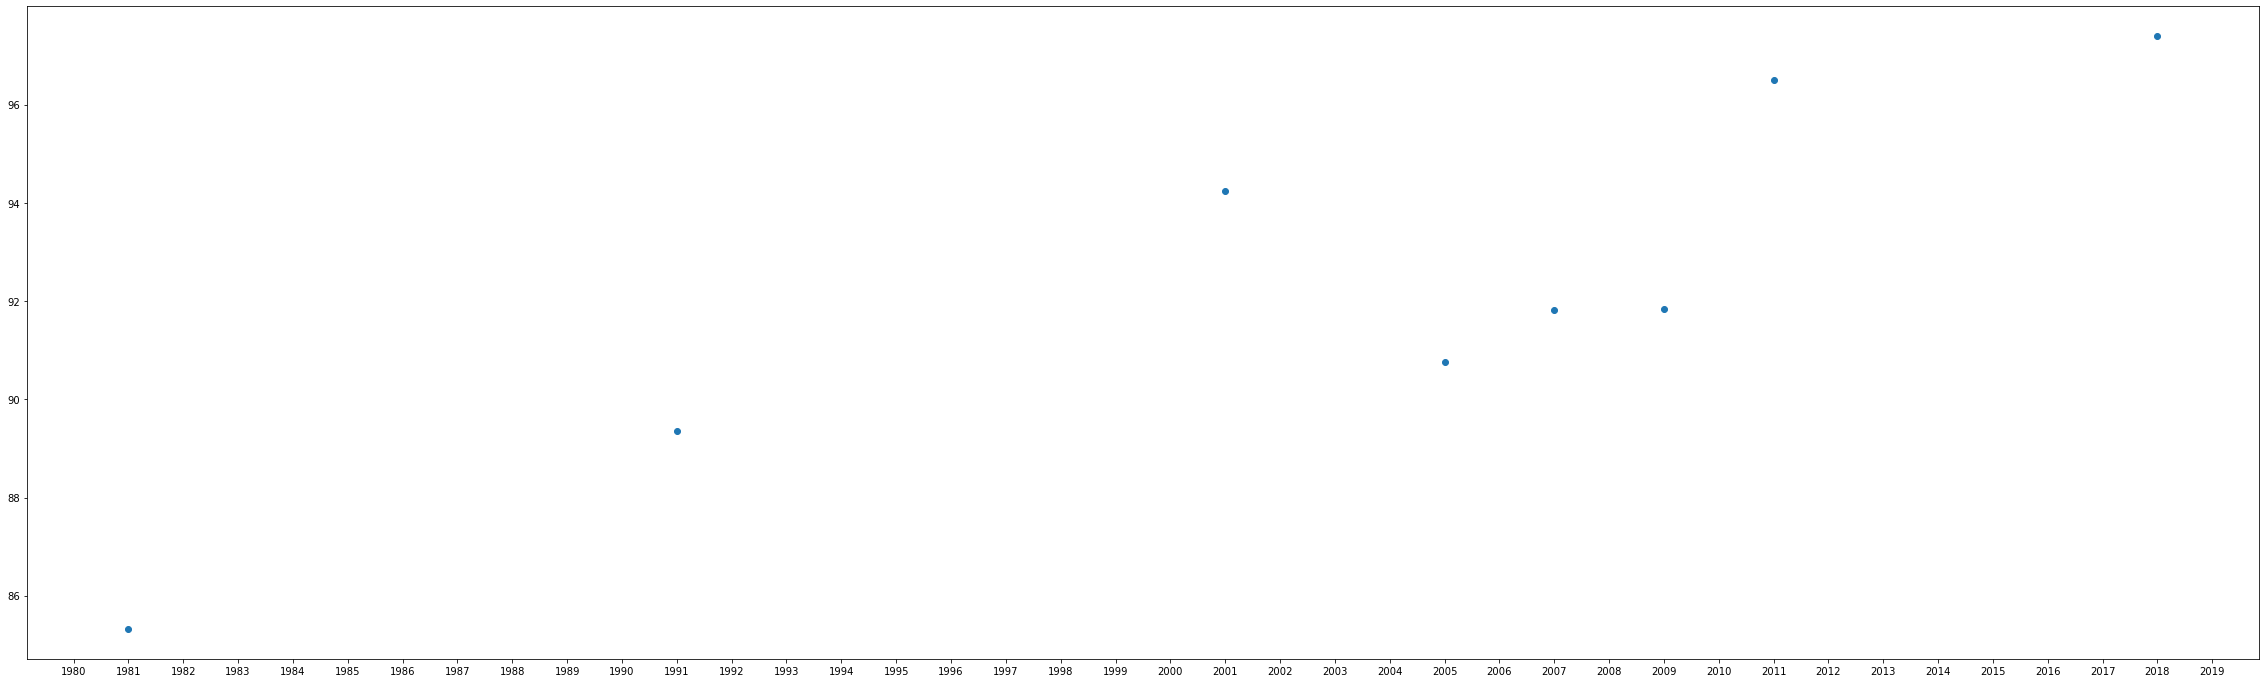

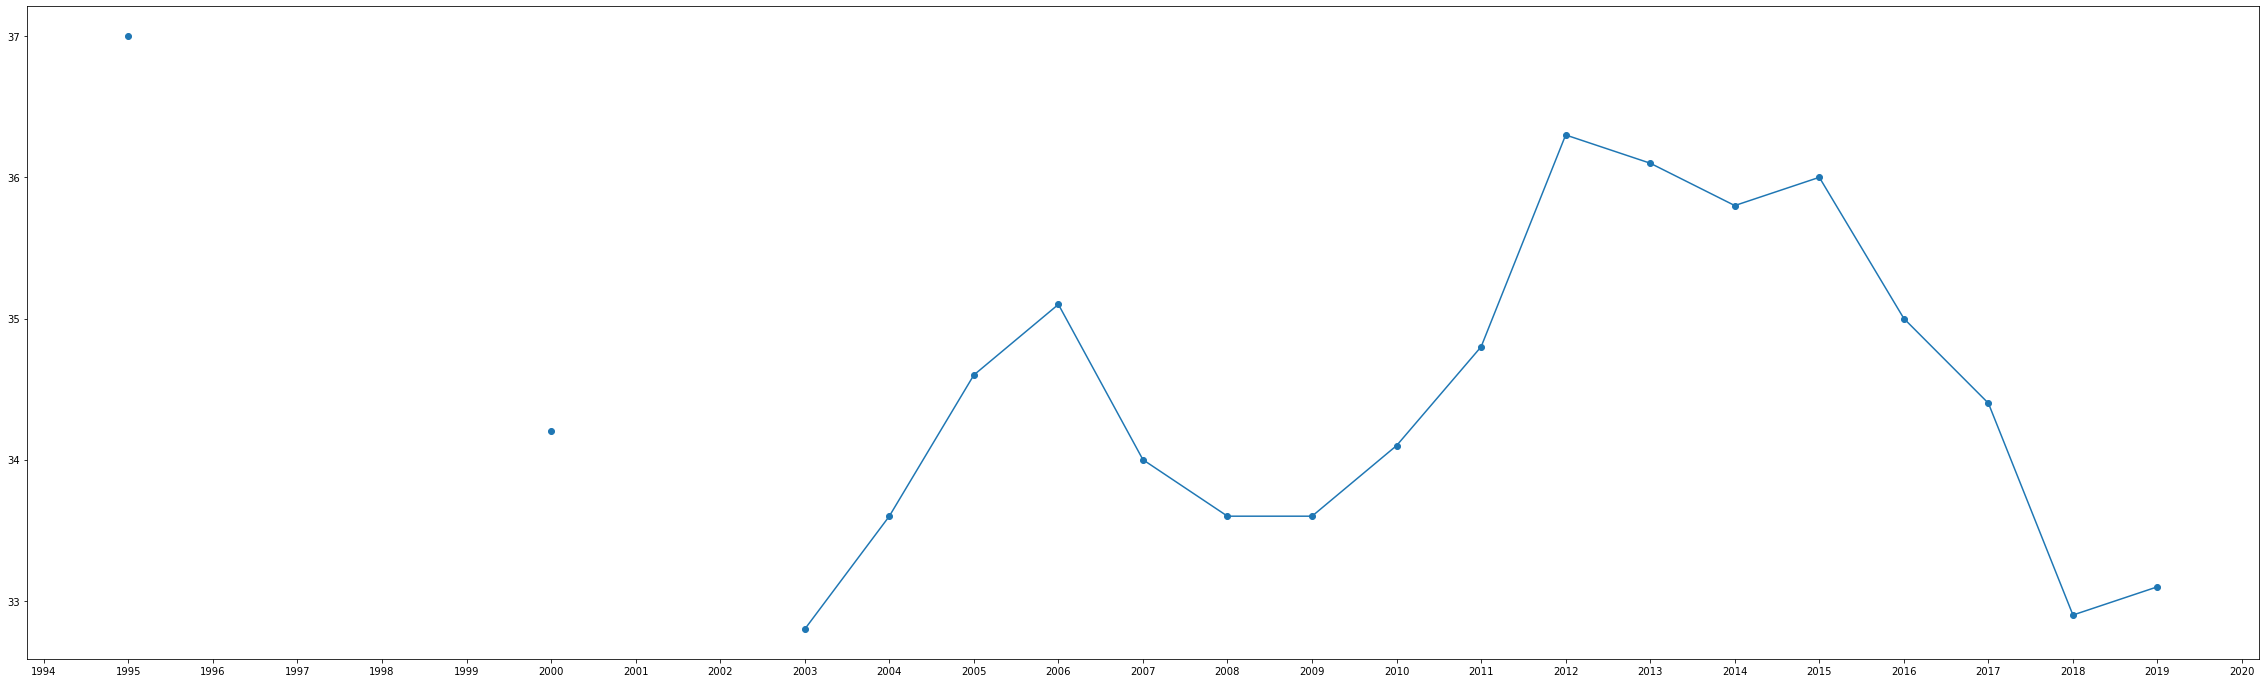

In [39]:
plotize(Childdf,'Greece')
plotize(Literacydf,'Greece')
plotize(Ginidf,'Greece')


When we plot the Bulgarian data:

* In the first chart, the child mortality rate progressed in a decreasing trend.
* Due to the low literacy rate of woman data in the second graph, we can notice that there are two data, one of which is low value, but it has still increased recently.
* In our last chart, the Gini index showed a fluctuating result, but increased in the last dates and decreased again

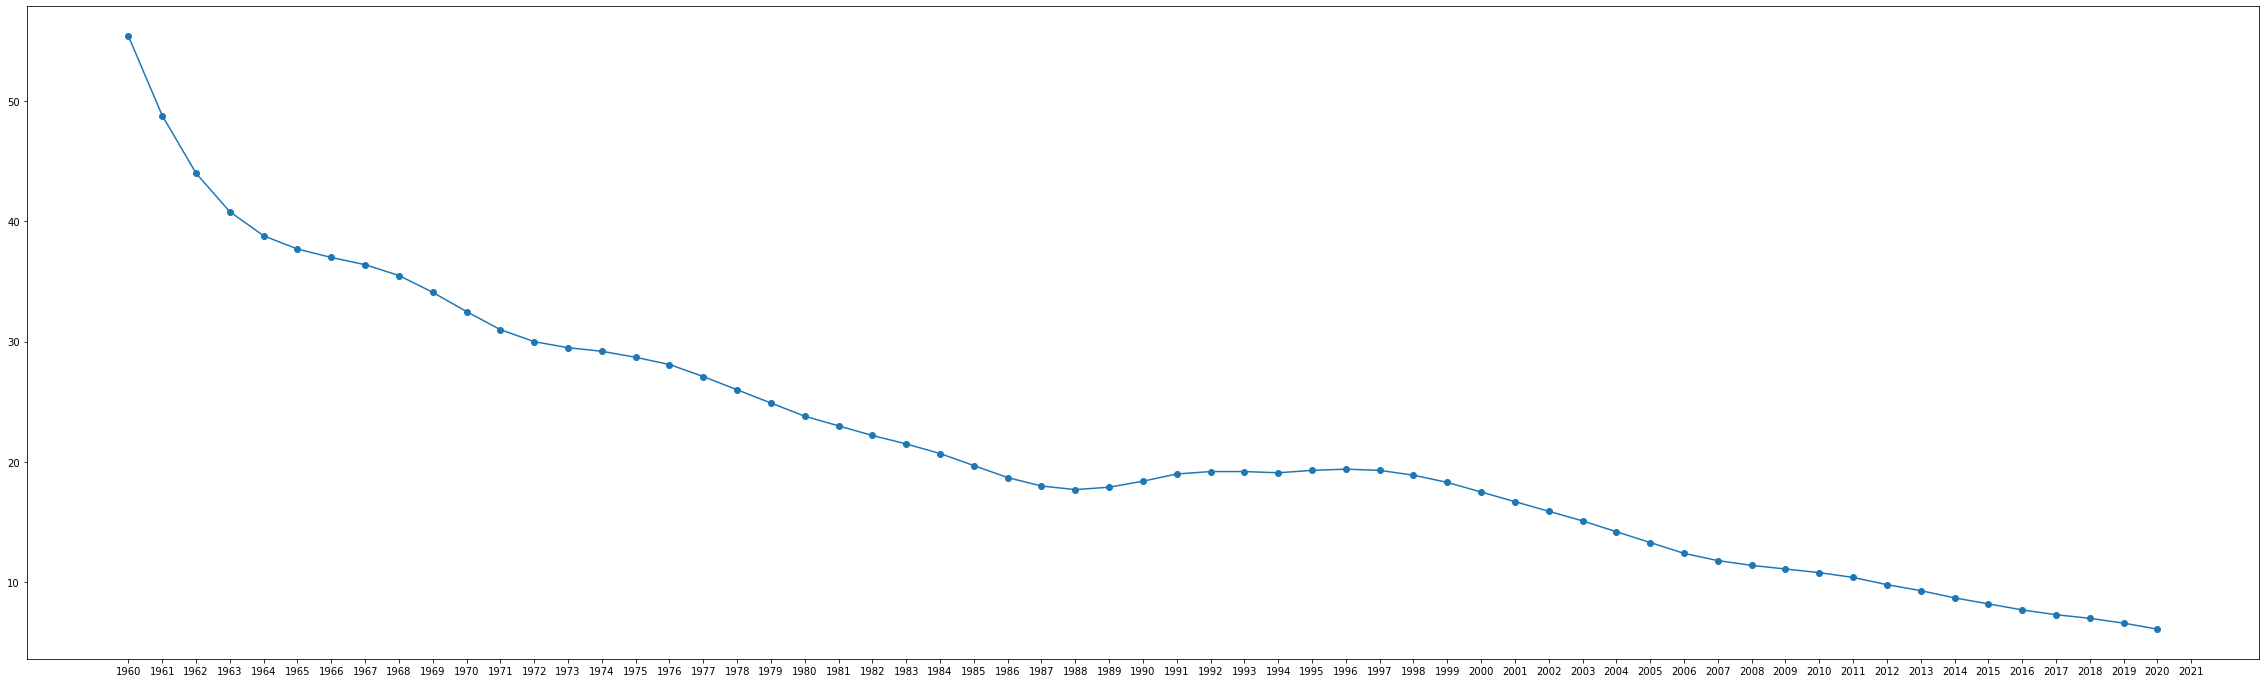

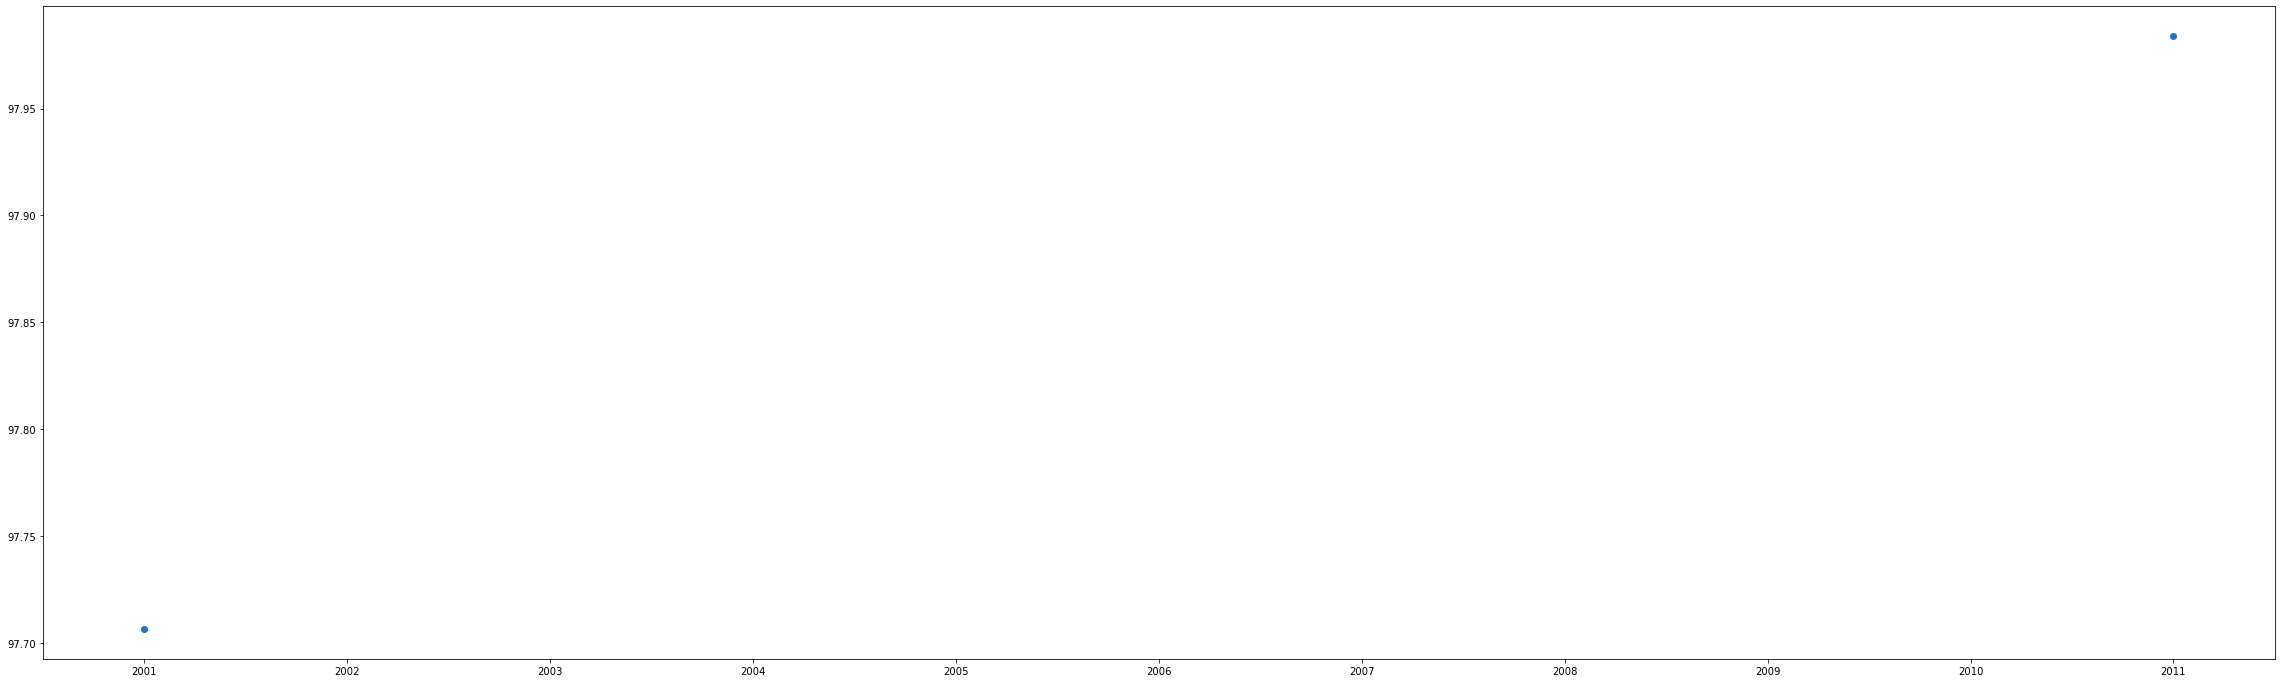

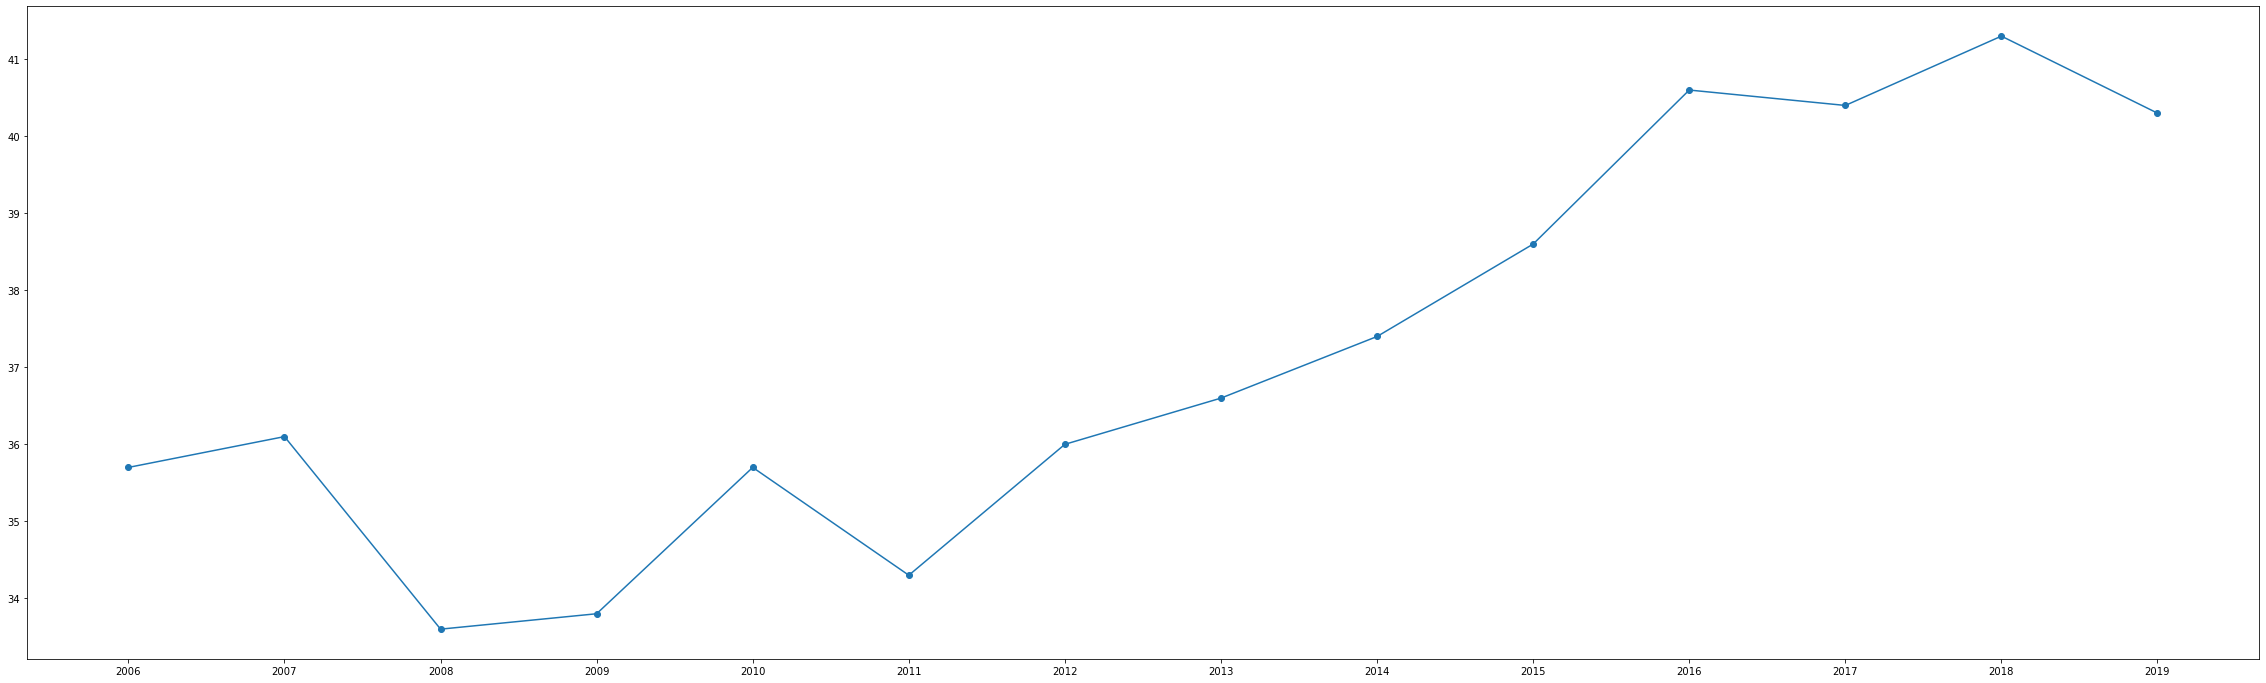

In [40]:
plotize(Childdf,'Bulgaria')
plotize(Literacydf,'Bulgaria')
plotize(Ginidf,'Bulgaria')

When we graph Romanian data:

* In the first chart, the child mortality rate progressed in a decreasing trend.
* In the second graph, there is only one data due to the fact that there is less literacy rate of woman again, we can notice that it has increased recently.
* In our last chart, the Gini index showed a fluctuating result but decreased in the last dates

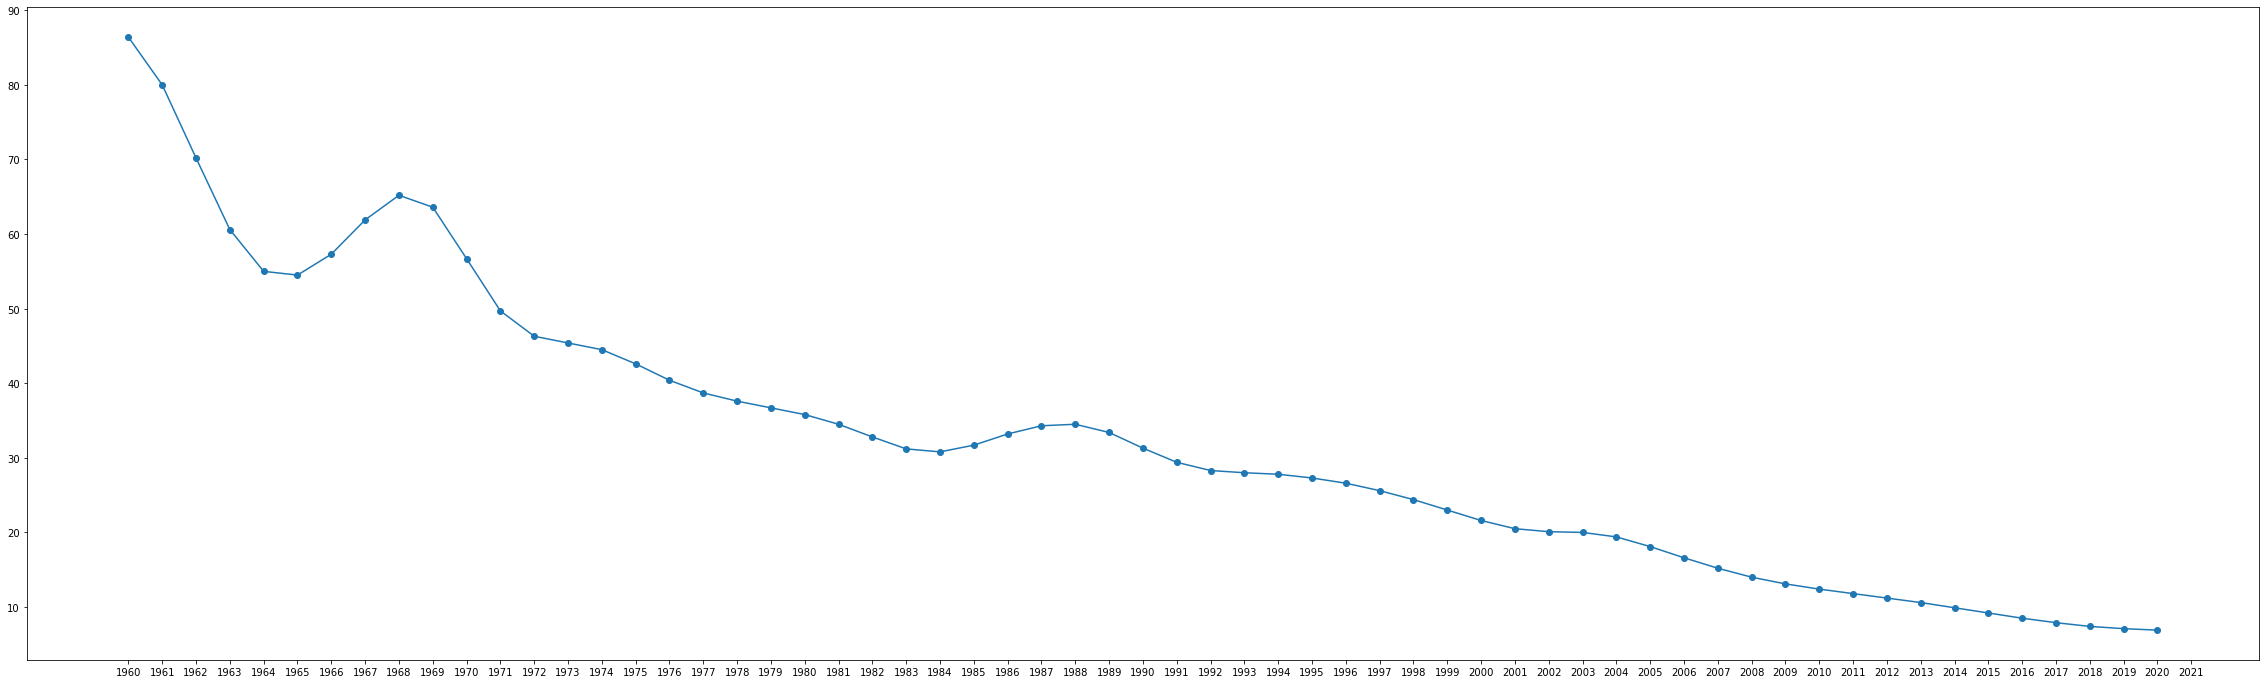

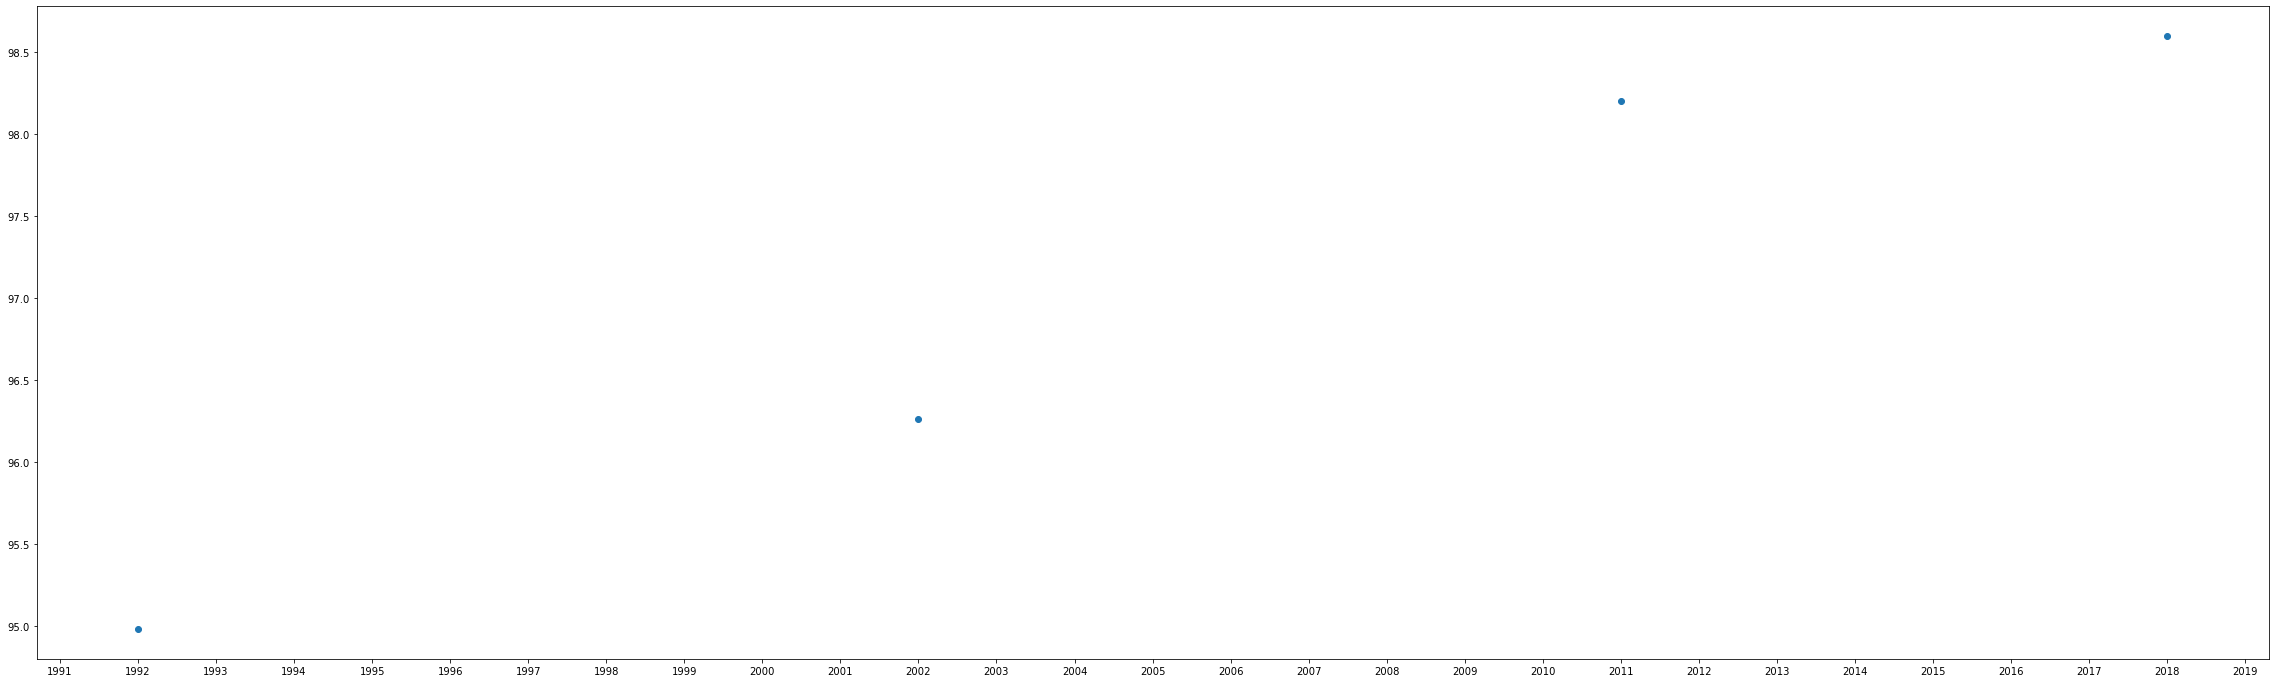

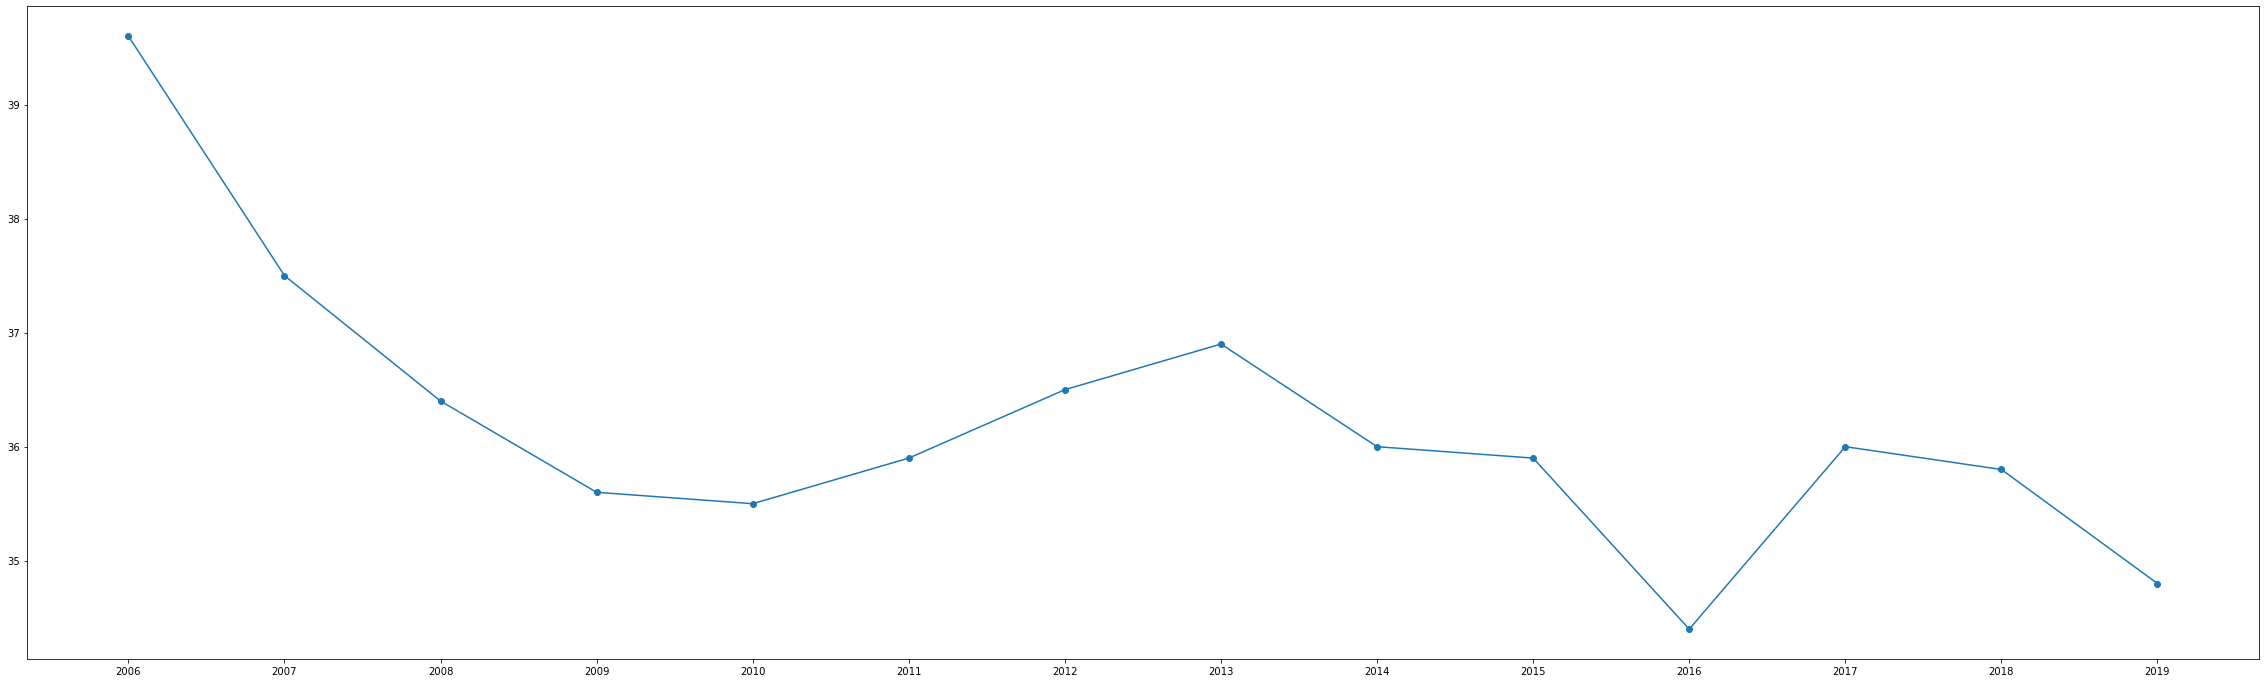

In [41]:
plotize(Childdf,'Romania')
plotize(Literacydf,'Romania')
plotize(Ginidf,'Romania')

When we graph the data for Poland:

* In the first chart, the child mortality rate progressed in a decreasing trend.
* In the second graph, there is little data again literacy rate of woman, but the existing ones remained constant.
* In our last chart, the Gini index showed a fluctuating result but decreased in the last dates

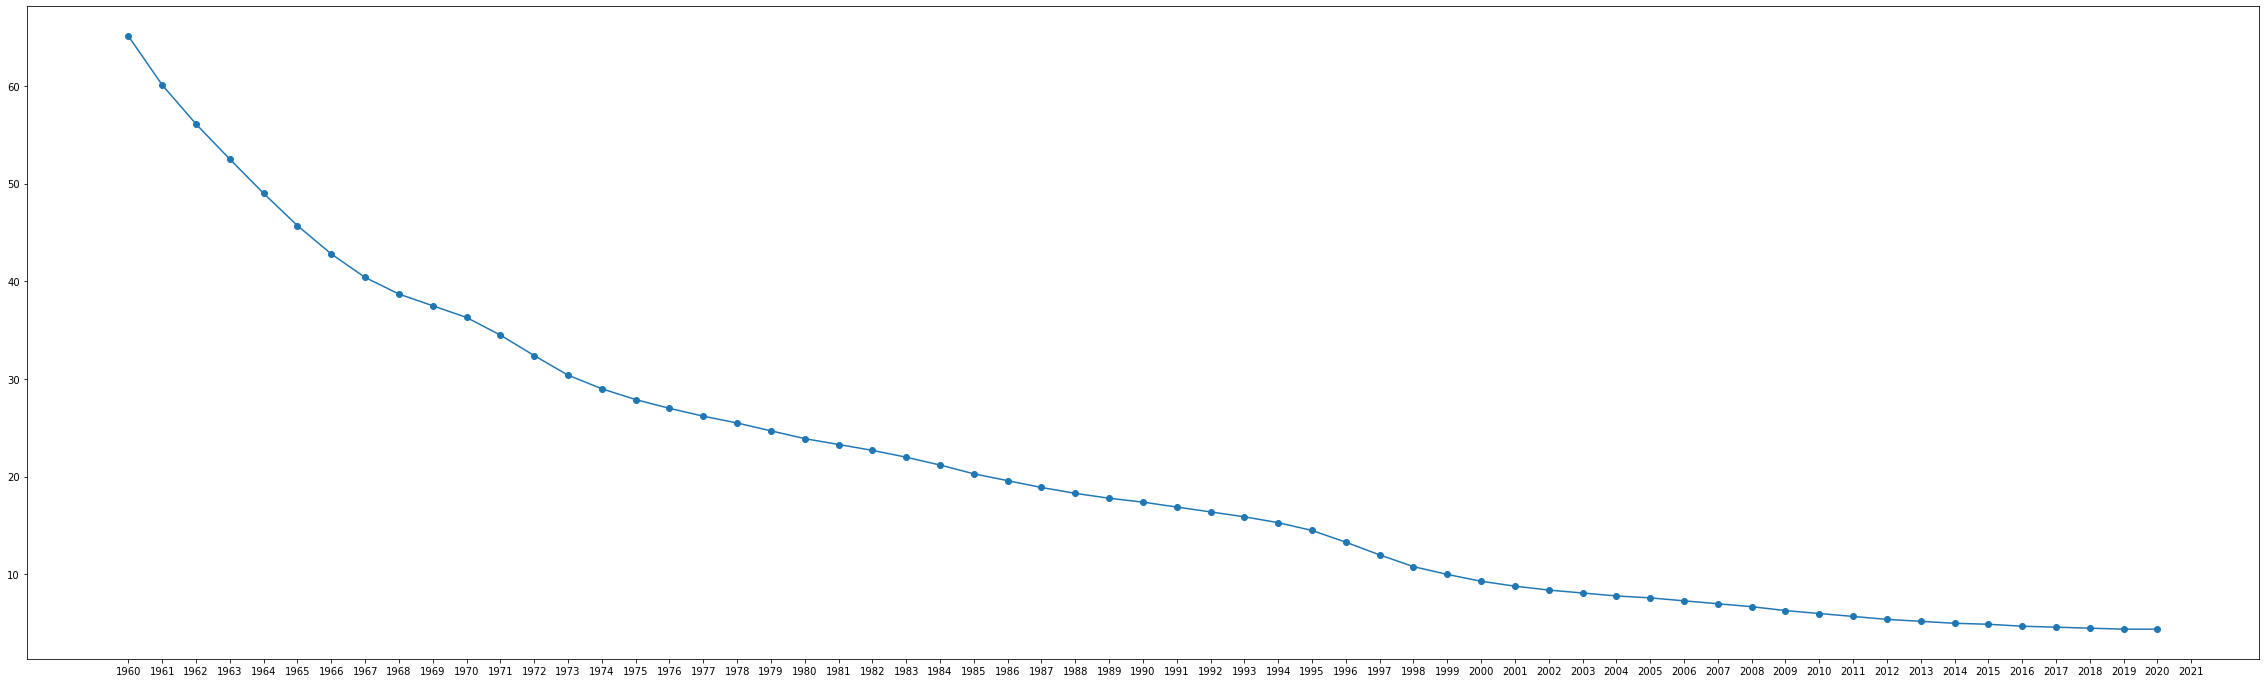

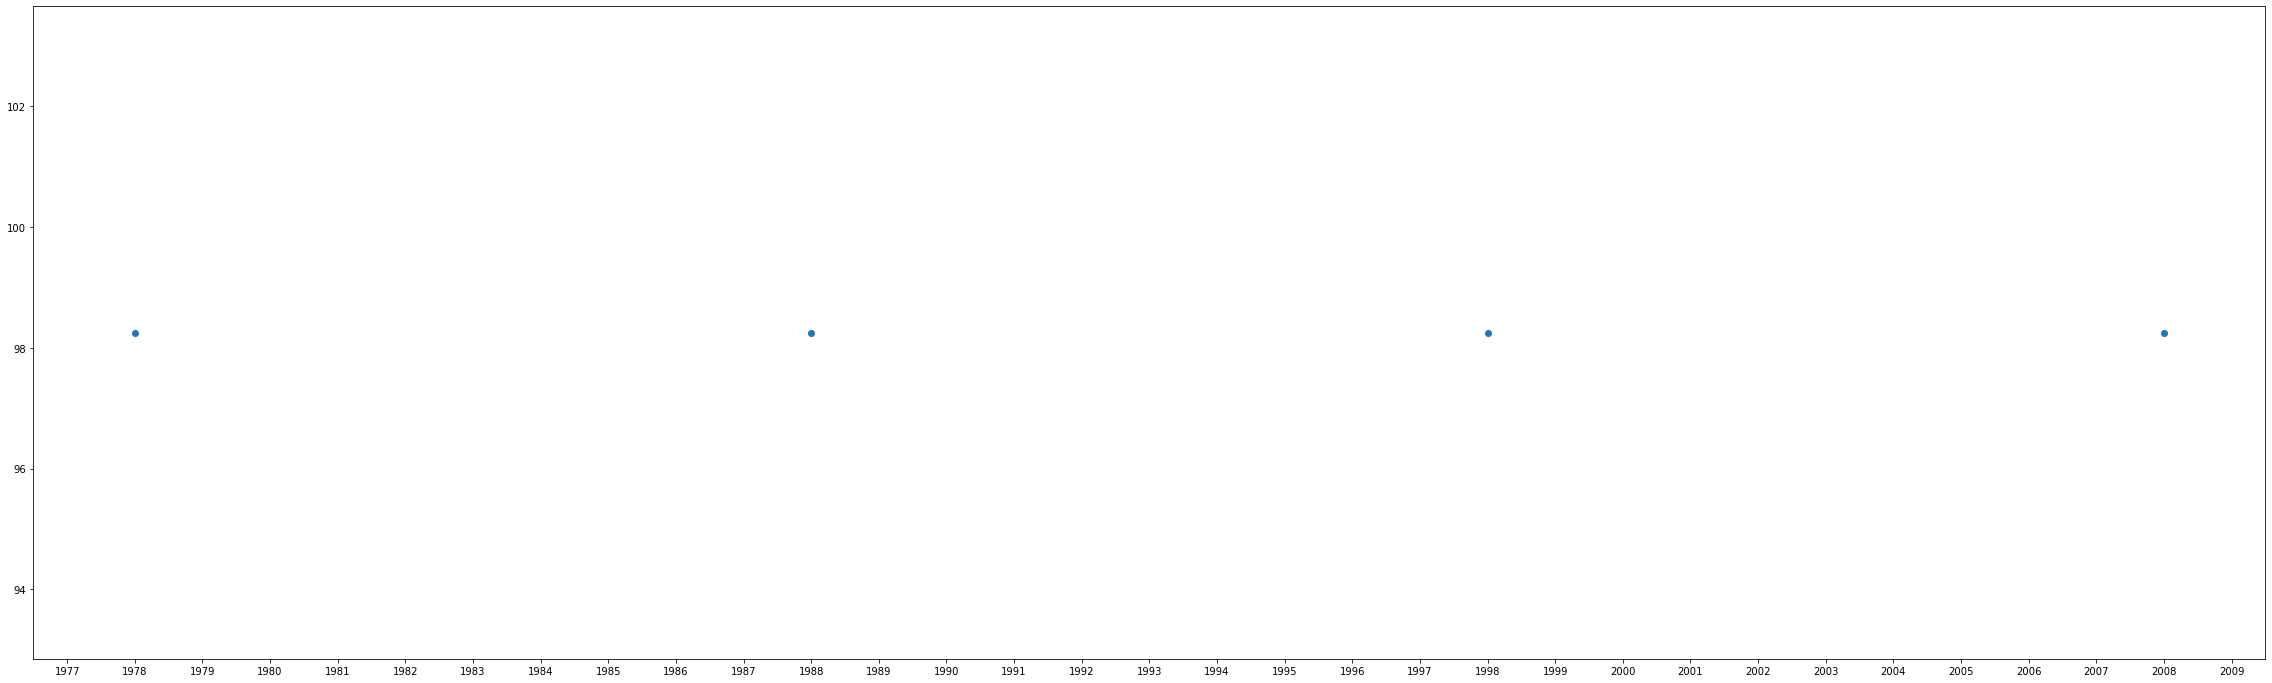

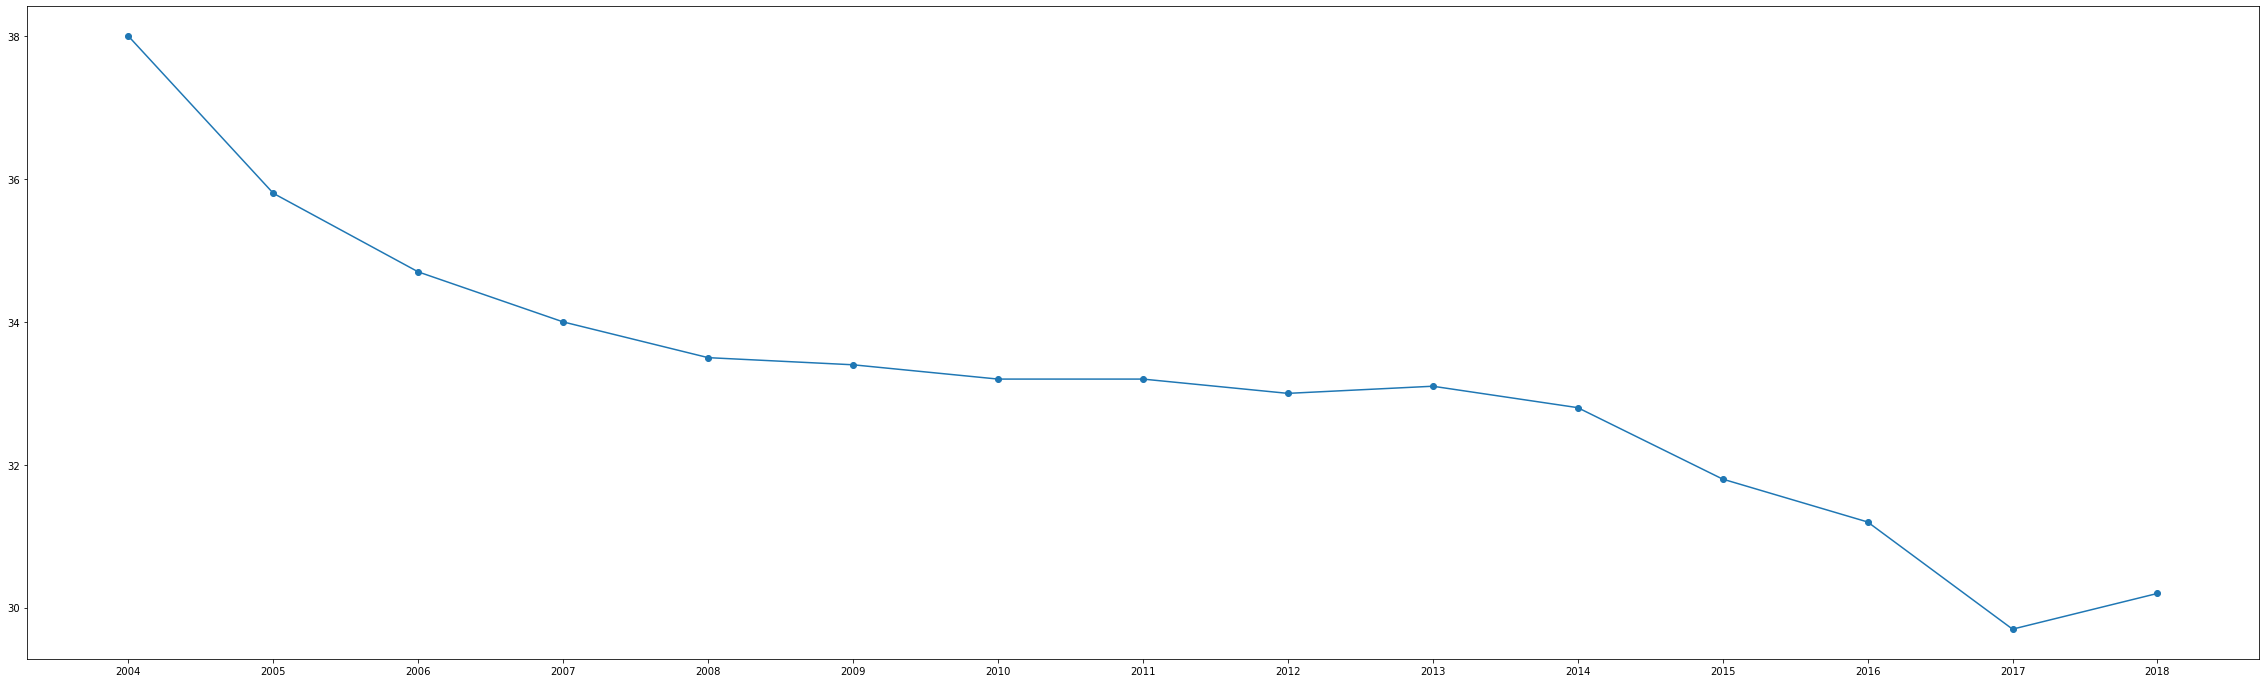

In [42]:
plotize(Childdf,'Poland')
plotize(Literacydf,'Poland')
plotize(Ginidf,'Poland')

When we plot the Syria data:

* In the first graph, we cannot say that the child mortality rate is a decreasing trend, it has fluctuated in between, but it has increased and decreased in recent times.
* In the second graph again literacy rate of woman is less data but remains stable but higher than the previous point.
* Gini index data is scarce in our last chart, but the difference between the two points is high

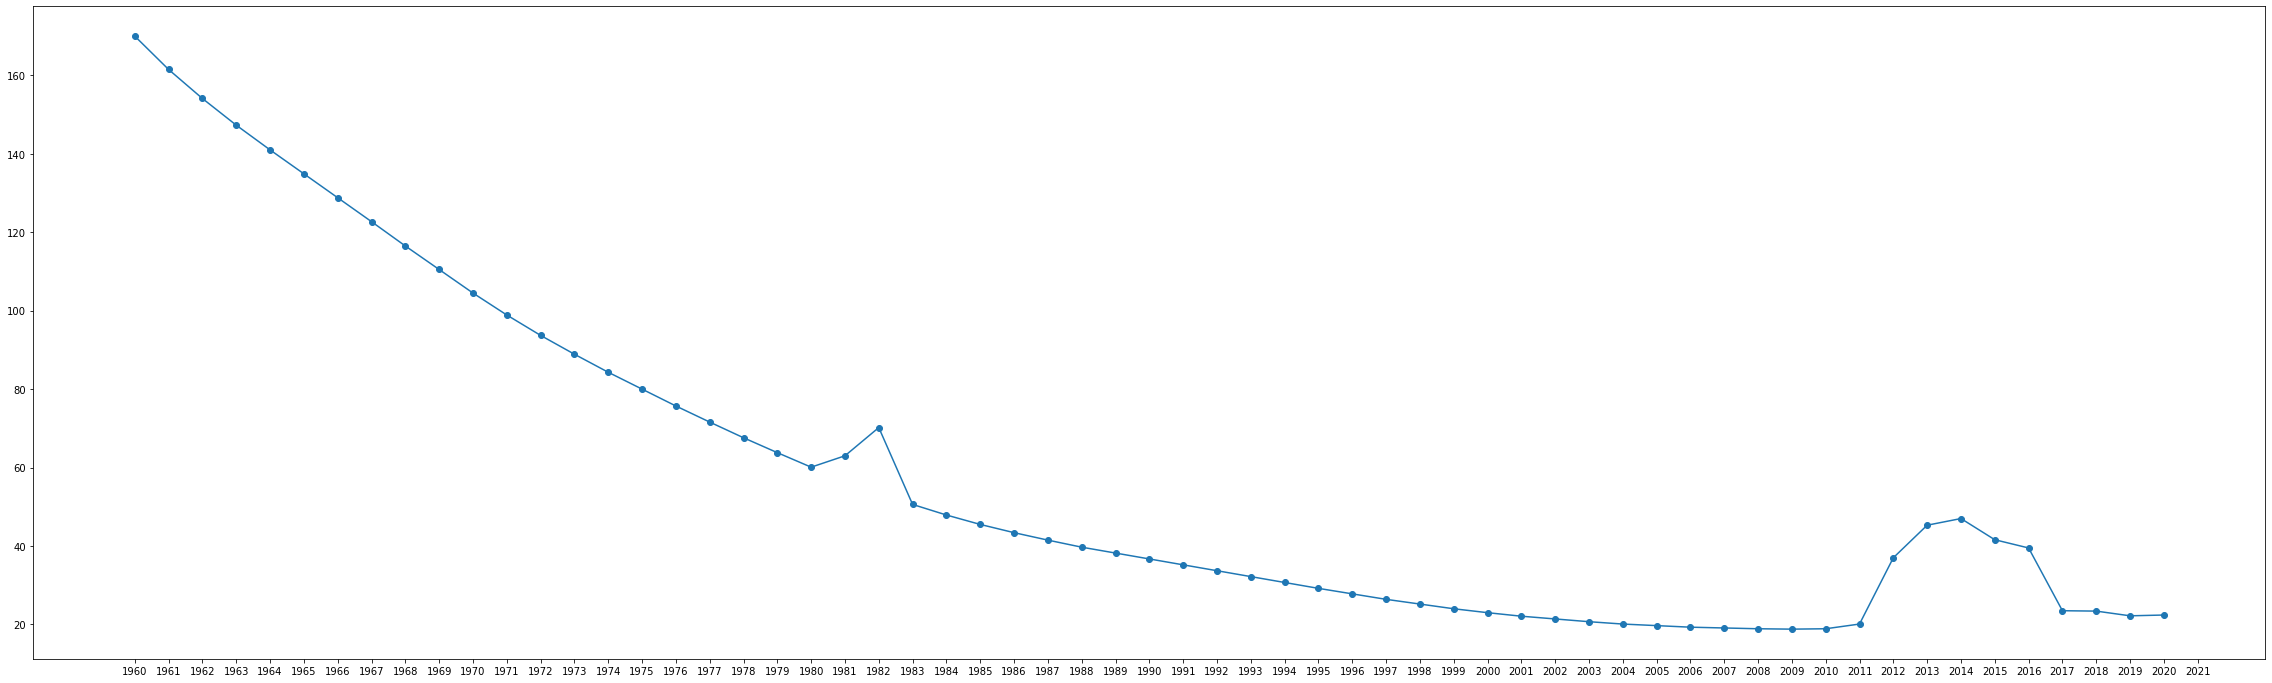

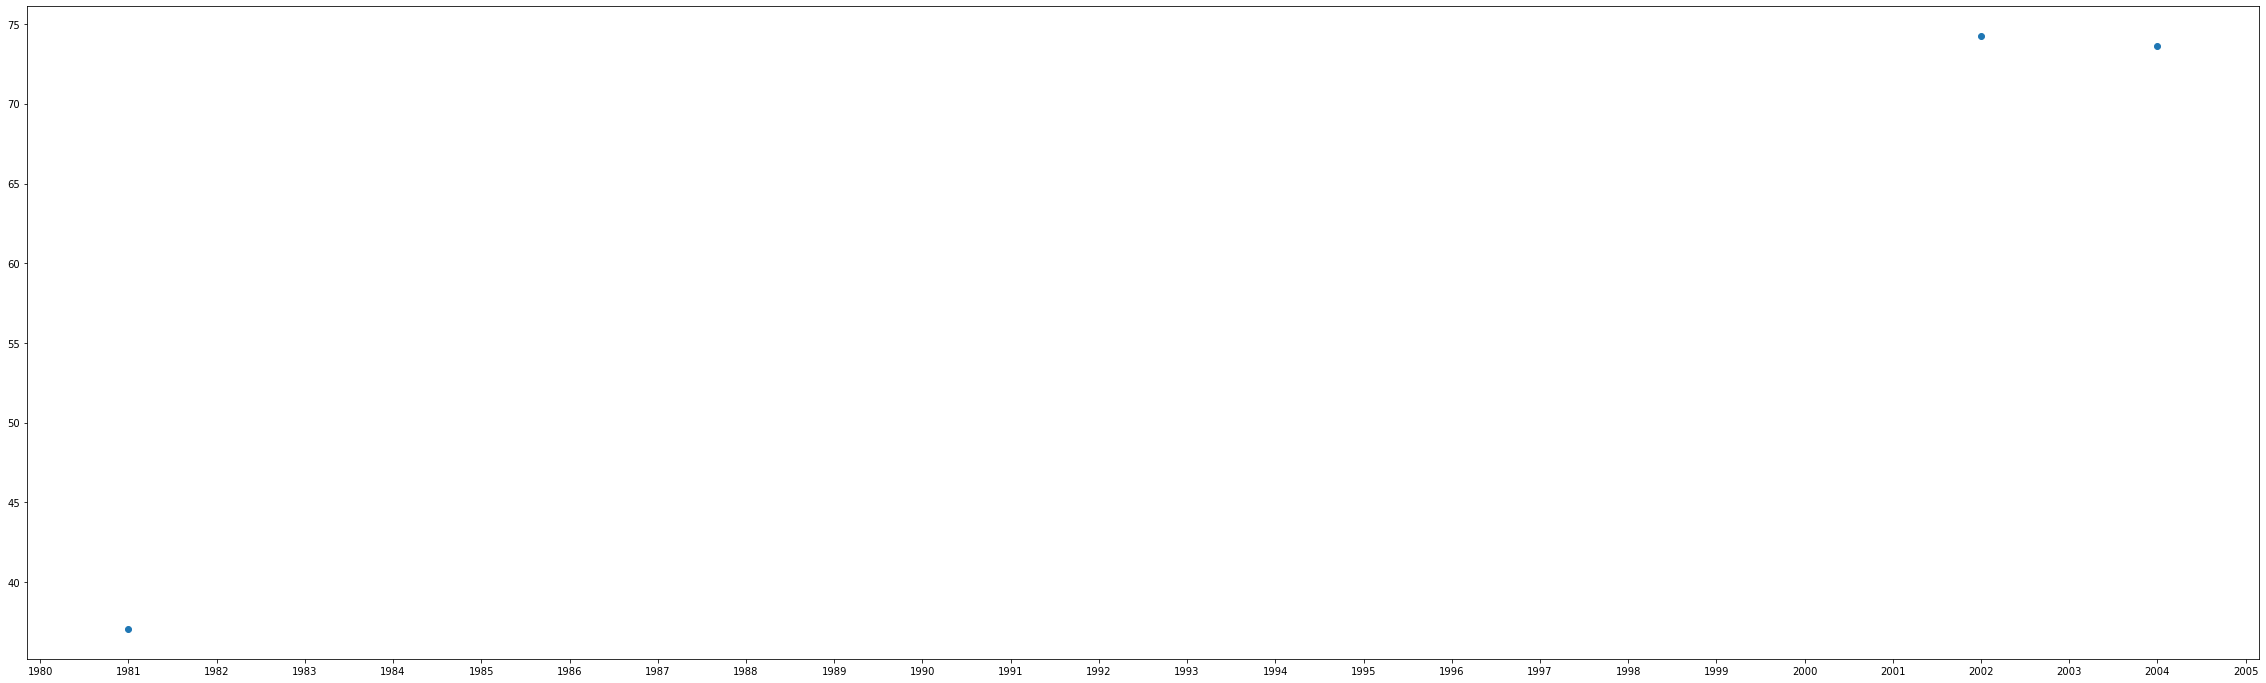

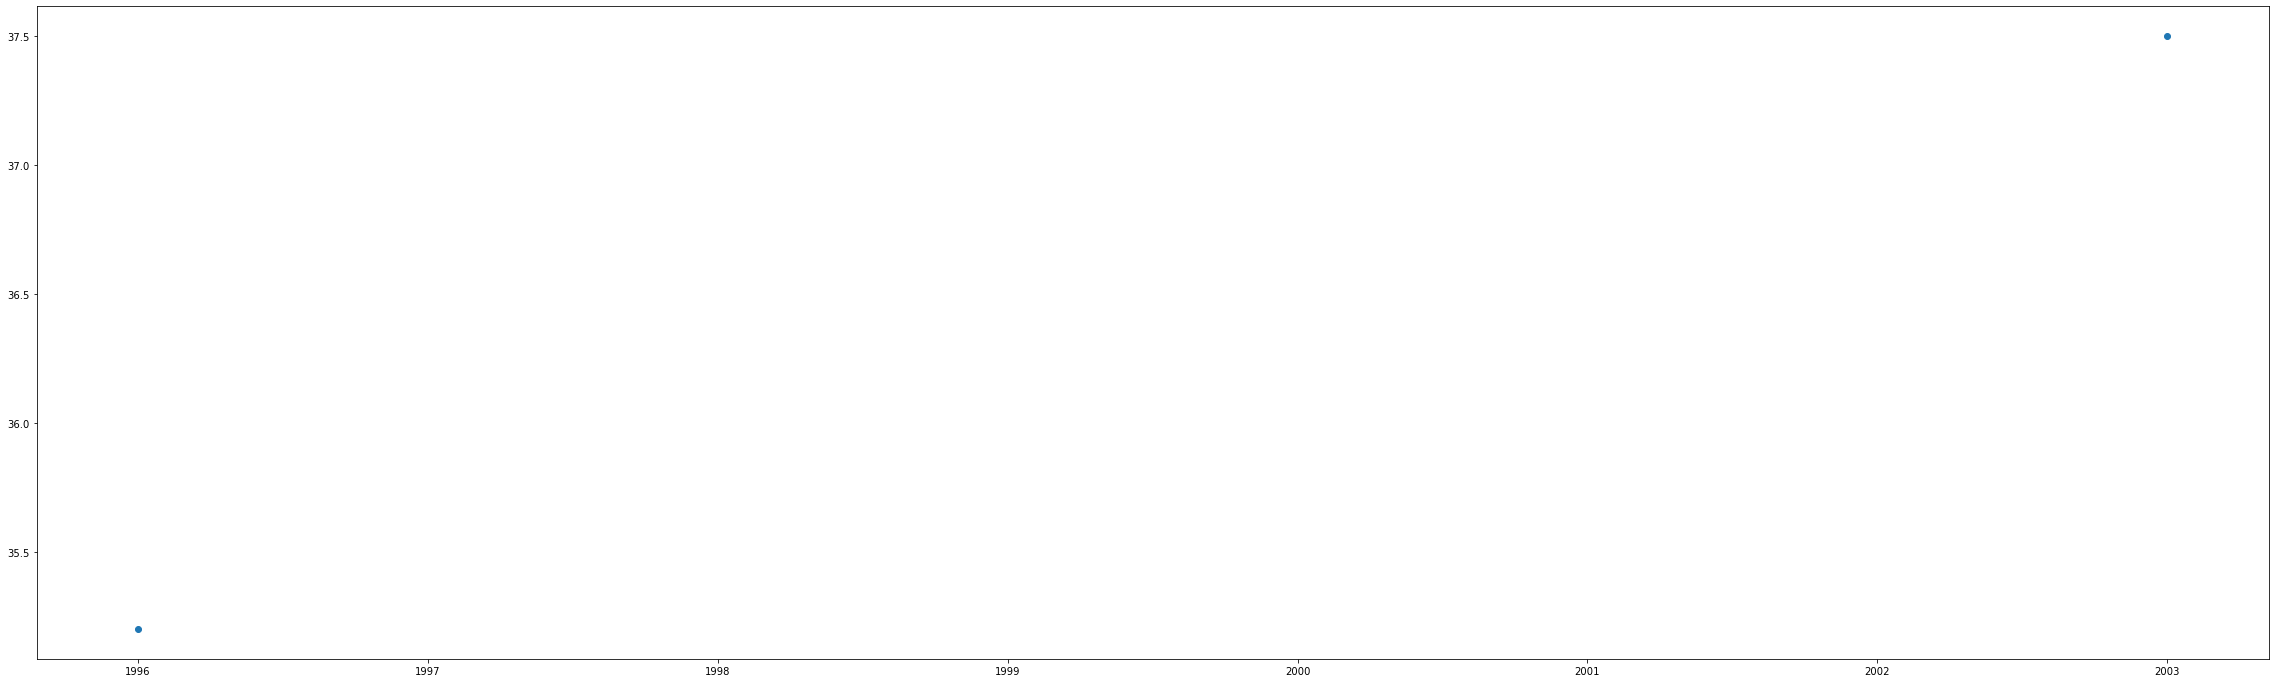

In [43]:
plotize(Childdf,'Syrian Arab Republic')
plotize(Literacydf,'Syrian Arab Republic')
plotize(Ginidf,'Syrian Arab Republic')

When we graph the Iran data:

* In the first chart, the child mortality rate showed a decreasing trend
* In the second graph, there is less data on literacy rate of woman, but it has progressed increasingly.
* There is a shortage of Gini index data in our last chart, there is a lot of fluctuation

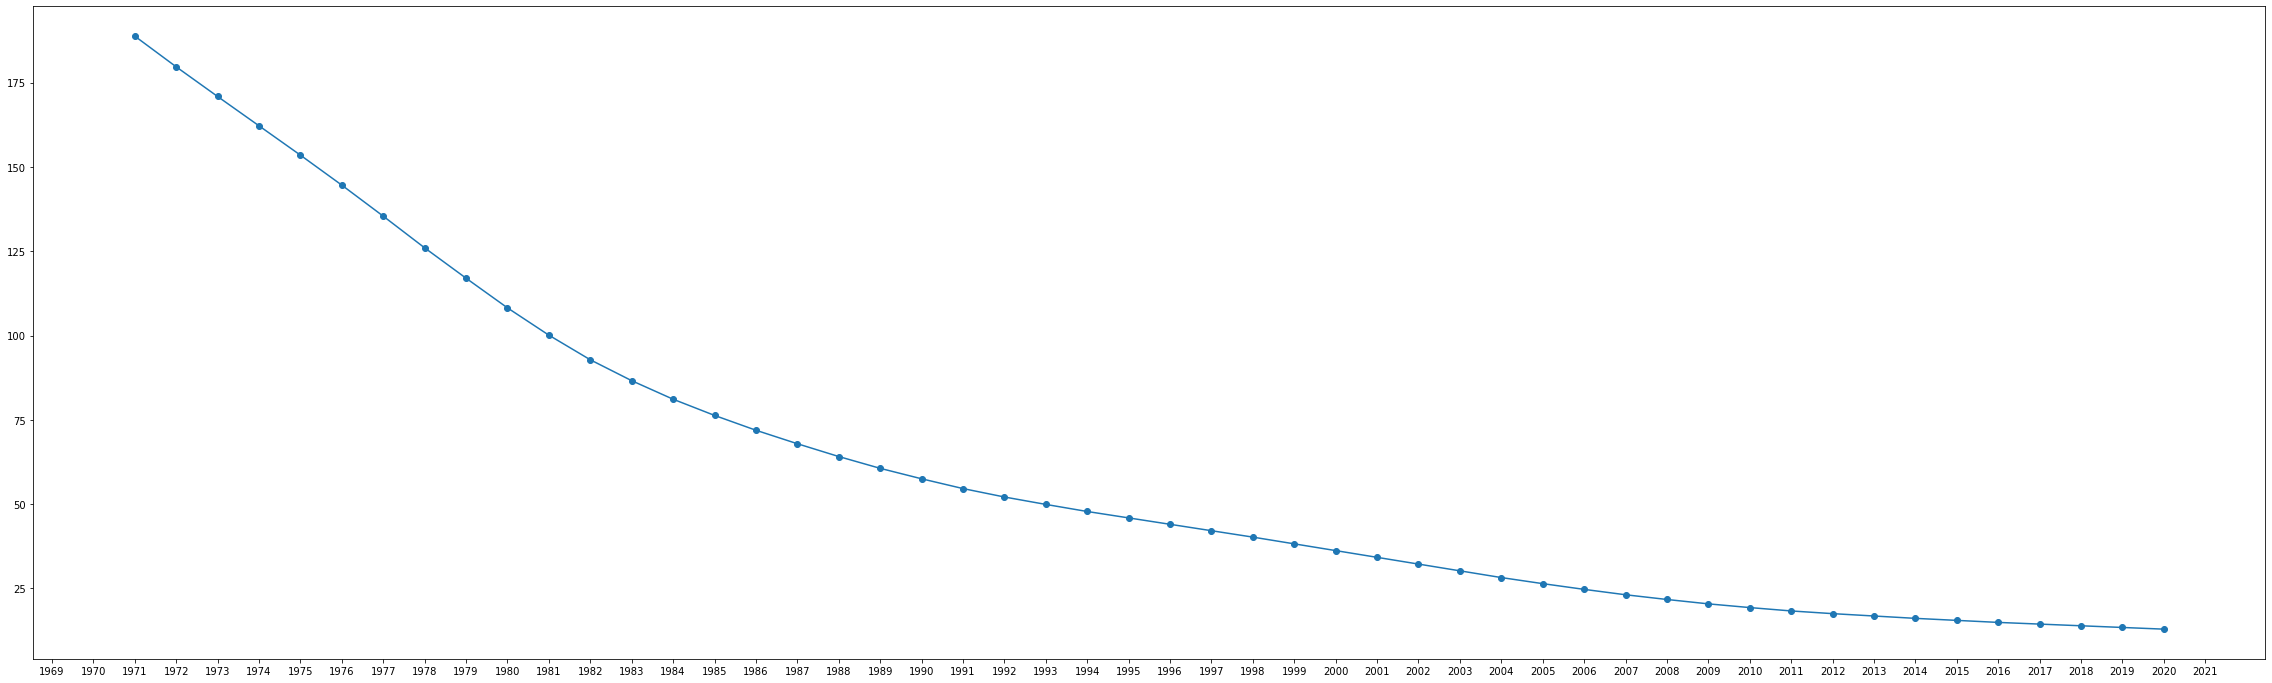

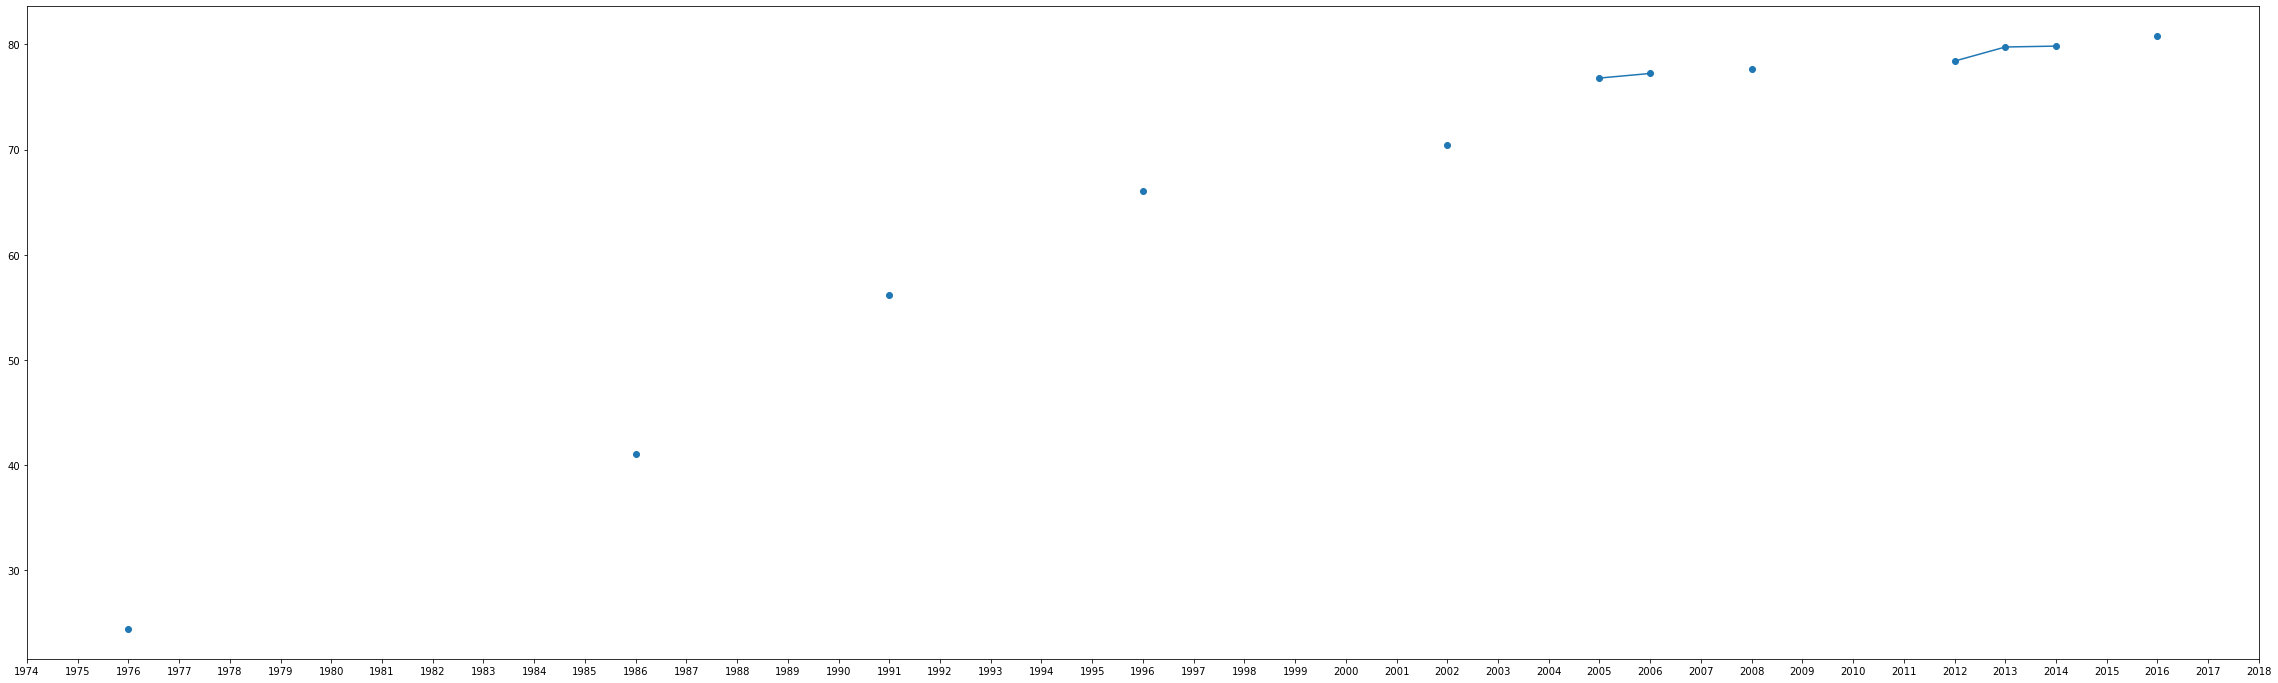

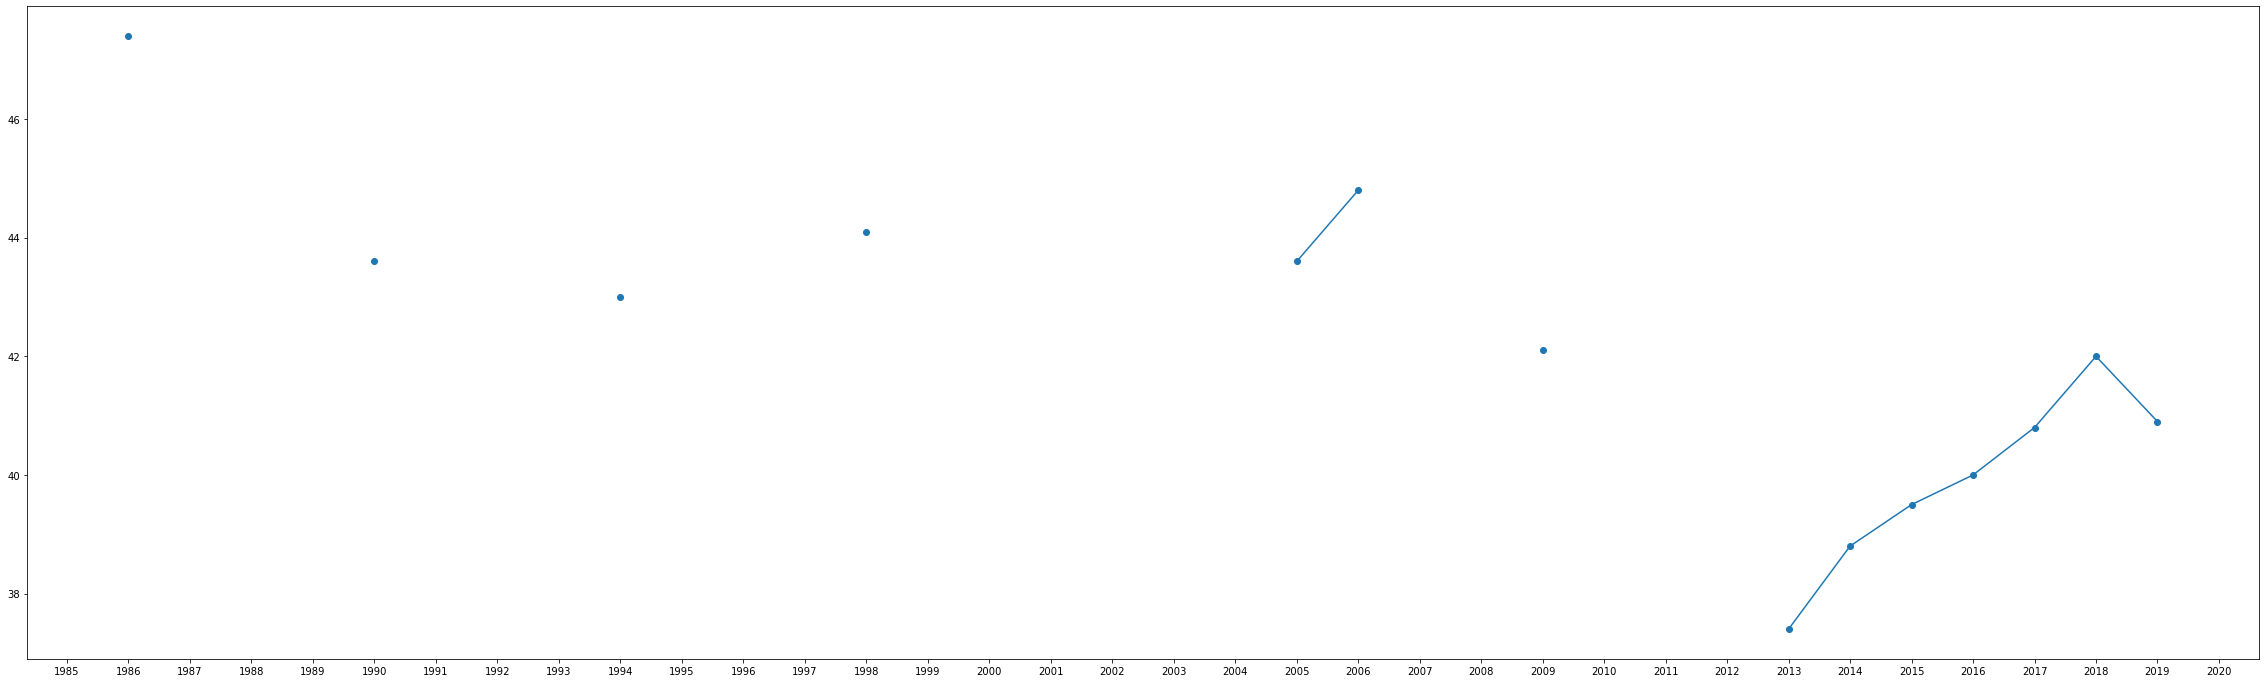

In [44]:
plotize(Childdf,'Iran, Islamic Rep.')
plotize(Literacydf,'Iran, Islamic Rep.')
plotize(Ginidf,'Iran, Islamic Rep.')

I needed to draw a scatter plot to compare the ratios. I wrote a function so as not to write it over and over again. Here, it takes two data, takes our filter value and draws a scatter.

In [41]:
def plotizeScatter(df,df1,filterv,xlabel,ylabel):
    df=df[df['Country or Area']==filterv]
    df1=df1[df1['Country or Area']==filterv]
    plt.scatter(df['Value'], df1['Value'], label='rate')
    plt.legend(loc='best', fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

There is a relationship between the literacy rate of women and the mortality rate in Turkey. There is an inverse relationship with the mortality rate decreasing as the literacy rate of women increases.

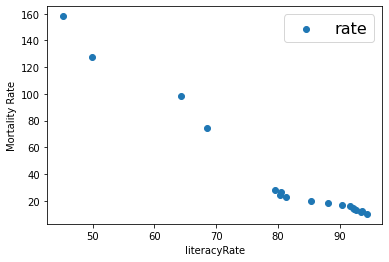

In [43]:
plotizeScatter(Literacydf,Childdf,'Turkiye','literacyRate','Mortality Rate')


I think there is no relationship between Literacy rate and Gini index in Turkey. Showed a parabolic impression

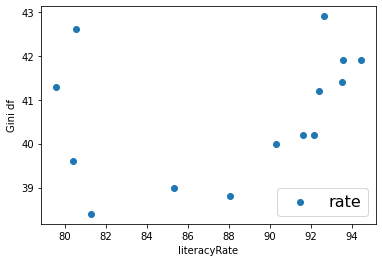

In [45]:
plotizeScatter(Literacydf,Ginidf,'Turkiye','literacyRate','Gini df')


There is a decreasing/increasing relationship between child mortality rate and gini index in Turkey with small differences in both directions.

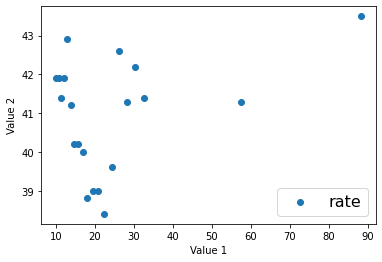

In [48]:
plotizeScatter(Childdf,Ginidf,'Turkiye')

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

I pulled our ibb data from the site with URLopen. Since I shot it in Excel, I had it read with pandas using the excel method.

**passage_cnt** : gives the number of trips.

**passanger_cnt** : It gives the number of users using the station.

**transaction_year**: year the station was used

**transaction_month** : The month the station is used

**line**: The line at the station is the first stop, the first stop

**station_name**: Station used

**station_number** : Station code

**town** : The district where the station is located

**latitude** : The latitude of the station

**longitude** : The longitude of the station

**Age-Group** Age range using the station

In [92]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read())
data.columns
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


Then I examined the types of the columns of the data and observed the objects that should be numeric. Came as latitude and longitude objects

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17082 entries, 0 to 17081
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   passage_cnt        17082 non-null  float64
 1   passanger_cnt      17082 non-null  float64
 2   transaction_year   17082 non-null  float64
 3   transaction_month  17082 non-null  int64  
 4   line               17082 non-null  object 
 5   station_name       17082 non-null  object 
 6   station_number     16962 non-null  object 
 7   town               17082 non-null  object 
 8   latitude           15987 non-null  object 
 9   longitude          15987 non-null  object 
 10  Age-Group          17082 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.4+ MB


I looked at the distribution of numeric values in the data. I got information about the average number, there are no missing rows.

In [94]:
data.describe()

,passage_cnt,passanger_cnt,transaction_year,transaction_month
count,17082.000000,17082.000000,1.708200e+04,17082.000000
mean,58.026383,76.181072,2.021000e+00,6.478984
std,126.686236,190.185332,4.658632e-13,3.451700
min,1.000000,1.000000,2.021000e+00,1.000000
25%,6.956000,3.544000,2.021000e+00,3.000000
50%,18.594500,9.063500,2.021000e+00,6.000000
75%,49.386000,29.004500,2.021000e+00,9.000000
max,999.000000,999.000000,2.021000e+00,12.000000


I checked if there is a repeating line, if so, to consider when editing the data.

In [95]:
data[data.isin(data[data.duplicated()])].sort_values("station_name").sum()

passage_cnt          0.0
passanger_cnt        0.0
transaction_year     0.0
transaction_month    0.0
line                   0
station_name           0
station_number         0
town                   0
latitude               0
longitude              0
Age-Group              0
dtype: object

I checked if there is a nan value, I observed that there is nan value in column 3(station_number latitude longitude).

In [96]:
data.isna().any()

passage_cnt          False
passanger_cnt        False
transaction_year     False
transaction_month    False
line                 False
station_name         False
station_number        True
town                 False
latitude              True
longitude             True
Age-Group            False
dtype: bool

I looked at the data in latitude and longitude as unique. Then it is necessary to delete / change the data that comes as nan, null and datetime.

In [97]:
data['latitude'].unique()
data['longitude'].unique()

array([289920277777778, 289864444444444, nan, 289741111111111,
       289740833333333, 289478888888889, 288458333333333, 288565833333333,
       288635555555556, 288744166666667, 289202222222222, 288999444444444,
       289388055555556, 288886111111111, 288957777777778, 288420833333333,
       288780555555556, 288963055555556, 288945833333333, 289070555555556,
       288976666666667, 288706944444444, 289298611111111, 289517222222222,
       288900833333333, 290068611111111, 290238055555556, 290253333333333,
       290108611111111, 2903075, 289666944444444, 290145555555556,
       '[NULL]', 289871944444444, 29005, 289951944444444, 2898575,
       289594166666667, 290201388888889, 289748888888889, 289921388888889,
       287910555555556, 288425555555556, 288305555555556, 288012777777778,
       287661388888889, 287683888888889, 287964166666667, 287972222222222,
       28836, 287865, 288034444444444, 288267777777778, 290434166666667,
       290453611111111, 290303611111111, 29104666666666

In order to find the column with datetime, I wrote a inside longitude column of data searched which ones are equal to datetime. Only in Yenisahra station the longitude is entered incorrectly like this.

In [101]:
data.loc[data['longitude']==datetime.datetime(2022, 9, 29, 0, 0)]


,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
484,21.018,8.500,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,20-30
485,38.990,13.786,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,30-60
486,3.234,1.203,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,60+
487,2.291,800.000,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,<20
488,11.324,4.314,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,Unknown
1917,24.687,10.547,2.021,2,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,20-30
1918,44.858,16.393,2.021,2,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,30-60
1919,3.266,1.232,2.021,2,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,60+
1920,2.755,1.034,2.021,2,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,<20
1921,9.548,3.570,2.021,2,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,409845555555556,2022-09-29 00:00:00,Unknown


I found the longitude of Yenisahra from Google and added it to show it on the map. I searched and synchronized the station name Yenisahra in the data.

In [87]:
data.loc[data['station_name']=='Yenisahra', "longitude"] = '29090181'
data.loc[data['station_name']=='Yenisahra'].head(5)

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
484,21.018,8.500,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,40.984556,29090181,20-30
485,38.990,13.786,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,40.984556,29090181,30-60
486,3.234,1.203,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,40.984556,29090181,60+
487,2.291,800.000,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,40.984556,29090181,<20
488,11.324,4.314,2.021,1,M4-KADIKOY-TAVSANTEPE,Yenisahra,YSR-YSR,Kadıköy,40.984556,29090181,Unknown


When I look at the unique data again, I planned that it changed, now I need to remove the nan and nulls.

In [60]:
data['longitude'].unique()

array([289920277777778, 289864444444444, nan, 289741111111111,
       289740833333333, 289478888888889, 288458333333333, 288565833333333,
       288635555555556, 288744166666667, 289202222222222, 288999444444444,
       289388055555556, 288886111111111, 288957777777778, 288420833333333,
       288780555555556, 288963055555556, 288945833333333, 289070555555556,
       288976666666667, 288706944444444, 289298611111111, 289517222222222,
       288900833333333, 290068611111111, 290238055555556, 290253333333333,
       290108611111111, 2903075, 289666944444444, 290145555555556,
       '[NULL]', 289871944444444, 29005, 289951944444444, 2898575,
       289594166666667, 290201388888889, 289748888888889, 289921388888889,
       287910555555556, 288425555555556, 288305555555556, 288012777777778,
       287661388888889, 287683888888889, 287964166666667, 287972222222222,
       28836, 287865, 288034444444444, 288267777777778, 290434166666667,
       290453611111111, 290303611111111, 29104666666666

Then I converted the first latitude and longitude columns to numeric to clear the nan and nulls and then set them to 0 with the fillna method. I wrote this in a function.

In [61]:
def convertnan(data,value):
    data[value]= data[value].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
    

In [62]:
convertnan(data,'latitude')
convertnan(data,'longitude')

I checked to see if there's any value left.

In [64]:
data.isna().latitude.sum()

0

In [66]:
data[data['longitude']=='NULL']

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group


Our data has very high values and goes like 2.8 but latitude and longitude should be like 40.5 and 28.5. So I'm going to do the partitioning. But to determine this division work, I need to look at the length in latitude and longitude. I checked this by setting up a function and taking the dataframe and latitude or longitude into it, this function writes the unique lengths of the values, so I can calculate how much to divide by this.

In [19]:
ab=[]
def preprocessing(df,de):
    for x in df[de]:
        ab.append(len(str(x)))
        xx= np.array(ab)
    print(np.unique(xx)) 
preprocessing(data,'longitude') 

[ 3  7  8  9 10 17]


In [20]:
preprocessing(data,'latitude')

[ 3  5  7  8  9 10 17]


The values 3,5,7,8,9,10,17 are output. I need to take the minus 4 to get the latitude and longitude format. That's why I wrote the function. The values will look low and for example, if the height is 17, it will display the division with 10 to the 13th.

In [67]:
def divided(df,value):
    for x in df[value].index:
        if (len(str(df[value][x])))==17:
            df[value][x]=df[value][x]/(10**(13))
        elif (len(str(df[value][x])))==16:
            df[value][x]=df[value][x]/(10**(12))
        elif (len(str(df[value][x])))==10:
            df[value][x]=df[value][x]/(10**(6))
        elif (len(str(df[value][x])))==9:
            df[value][x]=df[value][x]/(10**(5))
        elif (len(str(df[value][x])))==8:
            df[value][x]=df[value][x]/(10**(4))
        elif (len(str(df[value][x])))==7:
            df[value][x]=df[value][x]/(10**(3))
        elif (len(str(df[value][x])))==5:
            df[value][x]=df[value][x]/(10**(1))
        elif (len(str(df[value][x])))==3:
            df[value][x]=df[value][x]/(10**(-1))
divided(data,'longitude')
divided(data,'latitude')

<ipython-input-67-24b90ed12736>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value][x]=df[value][x]/(10**(3))
<ipython-input-67-24b90ed12736>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value][x]=df[value][x]/(10**(13))
<ipython-input-67-24b90ed12736>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value][x]=df[value][x]/(10**(5))
<ipython-input-67-24b90ed12736>:18: SettingWithCopyWarning: 
A value is trying to be 

Then I calculated our passenger numbers according to station names and months. While doing this calculation, I also took the latitude and longitude as I will draw a map. I did it with the groupby function. I summed the number of passengers according to the columns I grouped with the sum function.

In [22]:
passangersum = data.groupby(['station_name','transaction_month','latitude','longitude']).passanger_cnt.sum().reset_index()
passangersum

,station_name,transaction_month,latitude,longitude,passanger_cnt
0,4 Levent 2 Güney,1,41.085722,29.006861,44.389
1,4 Levent 2 Güney,2,41.085722,29.006861,50.037
2,4 Levent 2 Güney,3,41.085722,29.006861,77.852
3,4 Levent 2 Güney,4,41.085722,29.006861,51.007
4,4 Levent 2 Güney,5,41.085722,29.006861,39.511
...,...,...,...,...,...
3323,Şişli Güney,8,41.063889,28.992139,222.029
3324,Şişli Güney,9,41.063889,28.992139,245.759
3325,Şişli Güney,10,41.063889,28.992139,298.622
3326,Şişli Güney,11,41.063889,28.992139,283.819


I used the folium function used to draw an interactive map of python. Thus, I arranged and colored the apartments according to the number of passengers. I limited it to the coordinates of Istanbul. Additionally I used the Clustring property so it specifies the total number in the same place.

In [123]:
import folium
from folium.plugins import FastMarkerCluster

istanbul_latitude = 41.015137 # Find the latitude of Istanbul
istanbul_longitude = 28.979530  

m=folium.Map(location=[istanbul_latitude,istanbul_longitude],
                 zoom_start=13,
                 tiles="CartoDB Positron")
FastMarkerCluster(data=list(zip(passangersum["latitude"].values, passangersum["longitude"].values))).add_to(m)


for index, row in passangersum.iterrows():

    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius= row['passanger_cnt']/80,
                        color="#A020F0",
                        fill=False).add_to(m)
    

display(m)

Then I gathered the number of passengers by grouping them according to age groups, and I put this in a dataframe called Age.
I created a dataframe called AgeSum, where I grouped them according to the station name and age group and collected the number of passengers.

I calculated the probability like this:

For example, 

$$ (the number of 30-40  age  group  at a single station) \over (total number of 30-40 age group passengers at all stations) $$
I got the rates of specific age groups at the stations. Then I put it in a dataframe and made a nested dictionary, for example:

{30-40 : {ITU : 0.5}} -> {Age-Group : { Station name: probability }}

In [126]:
from collections import defaultdict
Age=data.groupby(['station_name','Age-Group']).passanger_cnt.sum().reset_index()
AgeSum=data.groupby(['Age-Group']).passanger_cnt.sum().reset_index()
dfTotal=pd.merge(Age, AgeSum, on=["Age-Group"])
dfTotal['proba']=dfTotal['passanger_cnt_x']/dfTotal['passanger_cnt_y']
dic=defaultdict(dict)
def Total(df):
    for index,row in df.iterrows():
            dic[row['Age-Group']][row['station_name']]=row['proba']
Total(dfTotal)
dic

defaultdict(dict,
            {'20-30': {'4 Levent 2 Güney': 0.002782992034971105,
              '4 Levent Kuzey': 0.003136094212748675,
              'AKSARAY': 0.005745718906038101,
              'AKSARAY 1': 0.0020456409455170267,
              'ALTINŞEHİR': 0.0010952407973211363,
              'ALİBEYKÖY BATI': 0.0008926798434685676,
              'ALİBEYKÖY DOĞU': 0.00046948759001936056,
              'ATAKOY': 0.007920599345413634,
              'Acıbadem (Batı)': 0.0005344963733903805,
              'Acıbadem (Doğu)': 0.0005773062610230795,
              'Aksaray': 0.006178676768127556,
              'Akıncılar': 0.0008774518456051558,
              'Akşemsettin': 0.0025941426308109827,
              'Ali Fuat Başgil': 0.0022926235094038964,
              'Alibeyköy': 0.0003411452618326804,
              'Alibeyköy Metro': 0.006209450344623169,
              'Altunizade 1': 0.004401828245793954,
              'Altunizade 2': 0.0017153251879000362,
              'Ataköy': 0.00070

Then, with the function I wrote, I filtered according to age groups and got the station with the highest probability. Surprisingly, all of them came out with MAHMUTBEY M7, but under <20, HOL 2 came out.

In [271]:
def max(df,value):
    df=df[df['Age-Group']==value]
    print(df.loc[df['proba'].idxmax()])
    
max(dfTotal,'20-30')
max(dfTotal,'30-60')
max(dfTotal,'60+')
max(dfTotal,'<20')
max(dfTotal,'Unknown')

station_name       MAHMUTBEY M7 HOL 1
Age-Group                       20-30
passanger_cnt_x               9356.08
passanger_cnt_y            125952.211
proba                        0.074283
Name: 142, dtype: object
station_name       MAHMUTBEY M7 HOL 1
Age-Group                       30-60
passanger_cnt_x              8400.954
passanger_cnt_y            128156.894
proba                        0.065552
Name: 420, dtype: object
station_name       MAHMUTBEY M7 HOL 2
Age-Group                         60+
passanger_cnt_x                8170.0
passanger_cnt_y            510778.628
proba                        0.015995
Name: 699, dtype: object
station_name       MAHMUTBEY M7 HOL 1
Age-Group                         <20
passanger_cnt_x             10748.458
passanger_cnt_y            331303.876
proba                        0.032443
Name: 973, dtype: object
station_name       MAHMUTBEY M7 HOL 1
Age-Group                     Unknown
passanger_cnt_x               15282.0
passanger_cnt_y           

In order to compare them all, I filtered them according to age groups for the function and assigned them a data frame, then I assigned the outputs to a list and merged them into multiple data with a for loop. Then I changed the names of the columns.

In [287]:
def AgeGroup(df,value):
    return df[df['Age-Group']==value].sort_values(by='proba',ascending=False)

df23=AgeGroup(dfTotal,'20-30')
df36=AgeGroup(dfTotal,'30-60')
df60=AgeGroup(dfTotal,'60+')
df20=AgeGroup(dfTotal,'<20')
dfUnk=AgeGroup(dfTotal,'Unknown')
dflist=[df23,df36,df60,df20,dfUnk]
dfcompare= dflist[0]
dfcompare=dfcompare[['station_name','proba']]
for i in dflist[1:]:
    dfcompare=dfcompare.merge(i[['station_name','proba']],on='station_name')
dfcompare.columns=['station_name','20-30 proba','30-60 proba','60+ proba','<20 proba','Unknown proba']
dfcompare

<ipython-input-287-60b3b30e9674>:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'proba_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfcompare=dfcompare.merge(i[['station_name','proba']],on='station_name')


,station_name,20-30 proba,30-60 proba,60+ proba,<20 proba,Unknown proba
0,MAHMUTBEY M7 HOL 1,0.074283,0.065552,0.007087,0.032443,0.074498
1,NURTEPE DOĞU,0.060762,0.006327,0.002437,0.009266,0.016155
2,Mahmutbey M7 Hol 2,0.046082,0.016948,0.002242,0.006649,0.011851
3,Çayırova,0.042214,0.039818,0.001966,0.002765,0.007961
4,Mahmutbey M7 Hol 1,0.027796,0.031040,0.000640,0.003027,0.004670
...,...,...,...,...,...,...
270,Ayvansaray,0.000231,0.000279,0.010182,0.012145,0.023289
271,MECİDİYEKÖY DOĞU,0.000147,0.000158,0.002124,0.005557,0.004161
272,Levent Batı konkors,0.000126,0.000090,0.002349,0.002899,0.010808
273,Bahçelievler,0.000079,0.000195,0.000008,0.000006,0.000015


# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

I imported the yfinance library to use in this question and pulled the necessary data from this library.

In [71]:
import yfinance as yahooFin 

With the Yahoo Fin method, I set Microsoft's Apple and NasdaQ data to be January 1, 2000 and took it as a dataframe with the history method.

In [72]:
retrMSFTnfo = yahooFin.Ticker("MSFT")  
strtDate = datetime.datetime(2000, 1, 1)  
fixTimeMP=retrMSFTnfo.history(start = strtDate)
retrAPPLnfo = yahooFin.Ticker("AAPL")   
fixTimeAAPL=retrAPPLnfo.history(start = strtDate)
retrNDXnfo = yahooFin.Ticker("NDX")   
fixTimeNDX=retrNDXnfo.history(start = strtDate)

I observed the data

In [73]:
fixTimeMP

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,36.810180,37.202195,35.124517,36.555370,53228400,0.0,0.0
2000-01-04 00:00:00-05:00,35.614533,36.731775,35.202918,35.320522,54119000,0.0,0.0
2000-01-05 00:00:00-05:00,34.850116,36.496578,34.301295,35.692947,64059600,0.0,0.0
2000-01-06 00:00:00-05:00,35.183321,35.712541,33.987676,34.497295,54976600,0.0,0.0
2000-01-07 00:00:00-05:00,34.066076,35.202918,33.654460,34.948109,62013600,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,235.410004,241.610001,234.660004,240.740005,28880400,0.0,0.0
2022-10-04 00:00:00-04:00,245.089996,250.360001,244.979996,248.880005,34888400,0.0,0.0
2022-10-05 00:00:00-04:00,245.990005,250.580002,244.100006,249.199997,20347100,0.0,0.0


In [74]:
fixTimeNDX

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,3755.739990,3836.860107,3643.250000,3790.550049,1510070000,0,0
2000-01-04 00:00:00-05:00,3766.570068,3766.570068,3542.729980,3546.199951,1511840000,0,0
2000-01-05 00:00:00-05:00,3543.129883,3576.169922,3371.750000,3507.310059,1735670000,0,0
2000-01-06 00:00:00-05:00,3488.310059,3513.550049,3334.020020,3340.810059,1598320000,0,0
2000-01-07 00:00:00-05:00,3337.260010,3529.750000,3314.750000,3529.600098,1634930000,0,0
...,...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,11059.169922,11296.429688,10985.009766,11229.730469,4415440000,0,0
2022-10-04 00:00:00-04:00,11477.849609,11609.250000,11462.370117,11582.540039,5004780000,0,0
2022-10-05 00:00:00-04:00,11429.469727,11647.620117,11312.519531,11573.179688,4091860000,0,0


I took the Close column and took the logarithm with numpy, then took the derivative. and I assigned them to variables. I converted these variables as dataframe

In [75]:
diffNDX=np.gradient(np.log(fixTimeNDX['Close']))
diffAPPL=np.gradient(np.log(fixTimeAAPL['Close']))
diffMP=np.gradient(np.log(fixTimeMP['Close']))

diffAPPL=pd.DataFrame(diffAPPL)
diffNDX=pd.DataFrame(diffNDX)
diffMP=pd.DataFrame(diffMP)


Then I combined these dataframes with the concat function and I got a single dataframe.

In [76]:
datadf=pd.concat([diffAPPL,diffMP,diffNDX], axis=1)


I changed the column names in order

In [77]:
datadf.columns=['NDX', 'APPL', 'MP']
datadf

,NDX,APPL,MP
0,-0.088077,-0.034364,-0.066635
1,-0.036775,-0.011937,-0.038831
2,-0.037993,-0.011792,-0.029832
3,-0.022116,-0.010544,0.003168
4,0.014268,0.010124,0.053407
...,...,...,...
5724,0.027795,0.033181,0.027112
5725,0.013676,0.017269,0.015063
5726,-0.002298,-0.004217,-0.004207
5727,-0.022029,-0.030955,-0.023607


I drew a histogram from the dataframe I created using 10 bins

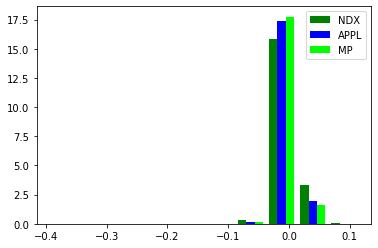

In [83]:
label = ['NDX','APPL','MP']
colors = ['green', 'blue', 'lime']
plt.hist(datadf, bins=10, density = True, 
         histtype ='bar',
         color = colors,
         label =label)
  
plt.legend(prop ={'size': 10})
plt.show()

I had it plotted on the same plot. I have observed that it decreases and increases at the same rate. But the NasdaQ initially showed a high decline.

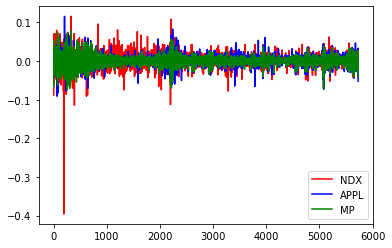

In [85]:
plt.plot(datadf['NDX'],color='red',label='NDX')
plt.plot(datadf['APPL'],color='blue', label='APPL')
plt.plot(datadf['MP'],color='green', label = 'MP')
plt.legend(prop ={'size': 10})
plt.show()

I imported the other libraries Scipy.stats with Researchpy. The test I decided on was the independent ttest. Because the data in the columns come from different data, so it will give better results. 

First, I compared NASDAQ and APPLE, it seems that there is no statistical difference, and the p-value is above 0.05. There is a relationship between these two variables.

In [173]:
import researchpy as rp
import scipy.stats as stats
def indettest(g1,g2):
    summary, results = rp.ttest(group1= g1, 
                            group2= g2)
    pvalue=stats.ttest_ind(g1,
                g2)
    return print(results,"\n\n\n",summary,"\n\n\n",pvalue)

indettest(datadf['NDX'],datadf['APPL'])


           Independent t-test     results
0  Difference (NDX - APPL) =       0.0006
1       Degrees of freedom =   11456.0000
2                        t =       1.9085
3    Two side test p value =       0.0564
4   Difference < 0 p value =       0.9718
5   Difference > 0 p value =       0.0282
6                Cohen's d =       0.0357
7                Hedge's g =       0.0357
8           Glass's delta1 =       0.0312
9         Point-Biserial r =       0.0178 


    Variable        N      Mean        SD        SE  95% Conf.  Interval
0       NDX   5729.0  0.000879  0.018056  0.000239   0.000412  0.001347
1      APPL   5729.0  0.000317  0.013117  0.000173  -0.000023  0.000656
2  combined  11458.0  0.000598  0.015783  0.000147   0.000309  0.000887 


 Ttest_indResult(statistic=1.9084902867367628, pvalue=0.05635284409102391)


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


I compared NASDAQ and Microsoft, it seems that there is statistical difference, and the p-value is 0.01.

In [175]:
indettest(datadf['NDX'],datadf['MP'])

          Independent t-test     results
0   Difference (NDX - MP) =       0.0007
1      Degrees of freedom =   11456.0000
2                       t =       2.4494
3   Two side test p value =       0.0143
4  Difference < 0 p value =       0.9928
5  Difference > 0 p value =       0.0072
6               Cohen's d =       0.0458
7               Hedge's g =       0.0458
8          Glass's delta1 =       0.0389
9        Point-Biserial r =       0.0229 


    Variable        N      Mean        SD        SE  95% Conf.  Interval
0       NDX   5729.0  0.000879  0.018056  0.000239   0.000412  0.001347
1        MP   5729.0  0.000177  0.012028  0.000159  -0.000134  0.000489
2  combined  11458.0  0.000528  0.015344  0.000143   0.000247  0.000809 


 Ttest_indResult(statistic=2.4494497667871586, pvalue=0.01432233418721183)


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


 I compared Microsoft and APPLE, it seems that there is no statistical difference, and the p-value is above 0.5. There is a relationship between these two variables.

In [176]:
indettest(datadf['APPL'],datadf['MP'])

          Independent t-test     results
0  Difference (APPL - MP) =       0.0001
1      Degrees of freedom =   11456.0000
2                       t =       0.5927
3   Two side test p value =       0.5534
4  Difference < 0 p value =       0.7233
5  Difference > 0 p value =       0.2767
6               Cohen's d =       0.0111
7               Hedge's g =       0.0111
8          Glass's delta1 =       0.0106
9        Point-Biserial r =       0.0055 


    Variable        N      Mean        SD        SE  95% Conf.  Interval
0      APPL   5729.0  0.000317  0.013117  0.000173  -0.000023  0.000656
1        MP   5729.0  0.000177  0.012028  0.000159  -0.000134  0.000489
2  combined  11458.0  0.000247  0.012584  0.000118   0.000017  0.000477 


 Ttest_indResult(statistic=0.592706908668043, pvalue=0.5533890160920281)


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
